For post-processing analysis of hydrolysis data.

In [1]:
# Numpy imports:    
import numpy as np

# Pandas for csv 
import pandas as pd

# for extracting filenames 
import glob

#Matplotlib imports
import matplotlib.pyplot as plt

# skimage submodules we need
import skimage.io

#Scipy imports
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

import os

import atp_hydro
atp_hydro.pboc_style_mpl()
# show images in viridis by default (pboc is fire?)
plt.rcParams['image.cmap'] = 'viridis'

# Import seaborn for aesthetic plots 
import seaborn as sns

from tqdm.notebook import tqdm

import pandas as pd
import ast

#### Load Data

In [2]:
data_location = '../../analyzed_data/atp-hydro/ADP.csv';

# Read the CSV file into a DataFrame
df = pd.read_csv(data_location); 

#Data Params:
#Nikon_10X_bin1_20sFrameInterval_100ms480_150ms405_1uMmicro_1400nM_A81D_2
frame_int = 20 #s
Motconc = 1 #uM, NCD Motors 
skip_int = 5 #data frames to skip 

#### Extract Relevant Parameters

In [3]:
# ATP Concentrations
ATP_conc_list = np.array(df["ATP Concentration (uM)"]); 

# ADP Concentrations
ADP_conc_list = np.array(df["ADP Concentration (uM)"]); 

# Phosphate Concentrations
P_conc_list = np.array(df["P Concentration (uM)"]); 

# ATP Curves
ATP_curve_list = [ast.literal_eval(df["ATP Curve (uM)"][i]) for i in range(len(df))]

# Ratio Curves
ratio_curve_list = [ast.literal_eval(df["Ratio (A.U.)"][i]) for i in range(len(df))]

# Goodness of Fit
linear_r2_list = np.array(df["r-squared for linear fit"]); 
exponential_r2_list = np.array(df["r-squared for exponential fit"]); 

# Hydrolysis Rate
linear_hydrolysis_rate_list = np.array(df["Hydrolysis Rate (uM/s/motor) from Linear Fitting (-abs(Slope)/Motconc)"]); 
exponential_hydrolysis_rate_list = np.array(df["Hydrolysis Rate (uM/s/motor) from Exponential Curve"]); 

# Time
times_list = [ast.literal_eval(df["Time Array (s)"][i]) for i in range(len(df))]

#### Reject Bad Curves

In [4]:
good_data_indices = list(range(len(df)))
max_too_late_indices = []
weird_max_conc_indices = []
empty_conc_indices = []
max_times = []
for i in range(len(df)):
    # Check list is not empty
    if ATP_curve_list[i] != []:

        # Reject if Max ATP < 80%
        # to do: consider a rejection criteria based on Km instead.
        max_times.append(times_list[i][np.where(ATP_curve_list[i] == np.amax(ATP_curve_list[i]))[0][0]])
        if np.amax(ATP_curve_list[i]) < 0.8*ATP_conc_list[i]: 
            weird_max_conc_indices.append(i)
    
    
        # Reject if Max ATP occurs after t > 5 mins
        max_index = np.where(ATP_curve_list[i] == np.amax(ATP_curve_list[i]))[0][0]; 
        if times_list[i][max_index] > 5*60: 
            max_too_late_indices.append(i)

    else: 
        max_times.append(np.nan)
        empty_conc_indices.append(i)
 
rejected_indices = np.array(list(set(max_too_late_indices + weird_max_conc_indices + empty_conc_indices))); 
accepted_indices = np.array([i for i in range(len(df)) if i not in rejected_indices]); 

print('indices of curves where max happens after 5 mins, ', len(max_too_late_indices))
print('indices where max ATP value is less than 80% of what it should be, ', len(weird_max_conc_indices))
print('indices of empty ATP curves, ', len(empty_conc_indices))
print('indices of good curves, ', len(accepted_indices))

indices of curves where max happens after 5 mins,  25
indices where max ATP value is less than 80% of what it should be,  32
indices of empty ATP curves,  9
indices of good curves,  32


#### Plots

##### Curves with Max occuring after 5 mins

/var/folders/f0/pddct2nd5dxf7qtf3z57b8_c0000gn/T/ipykernel_40096/2972671524.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unico

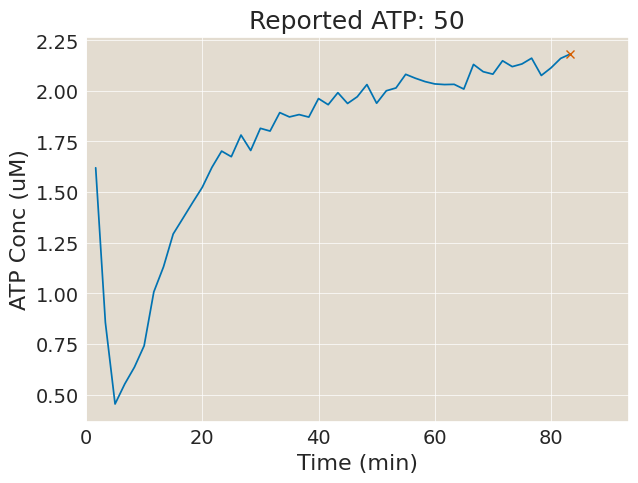

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

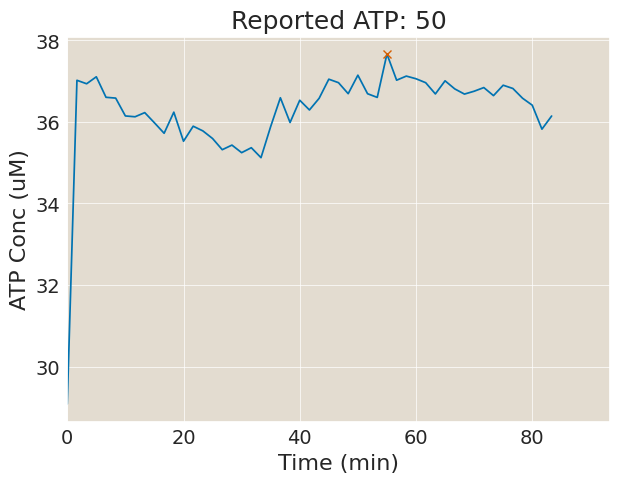

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

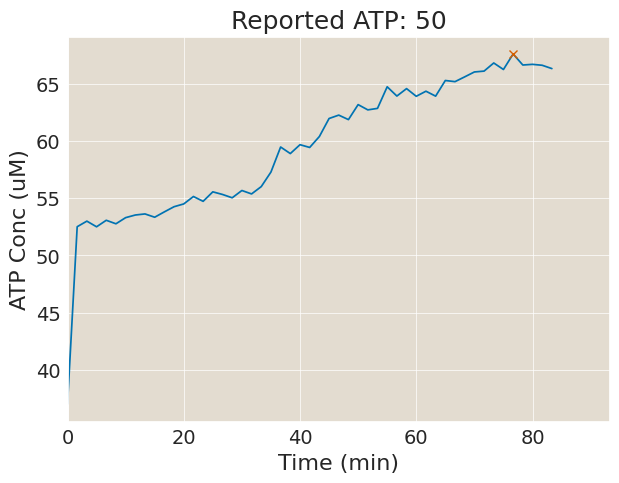

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

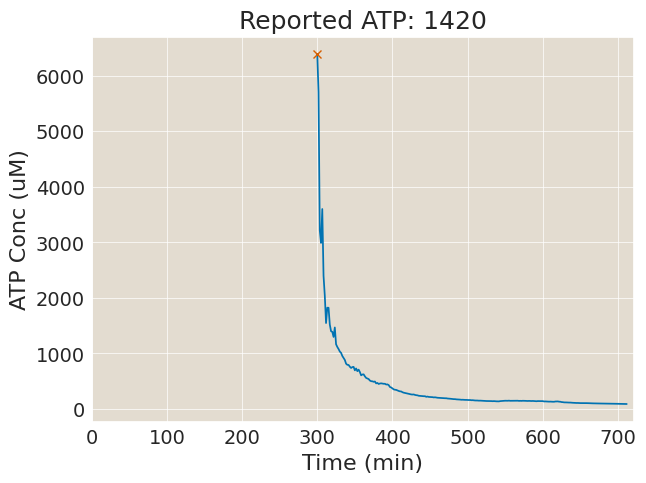

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

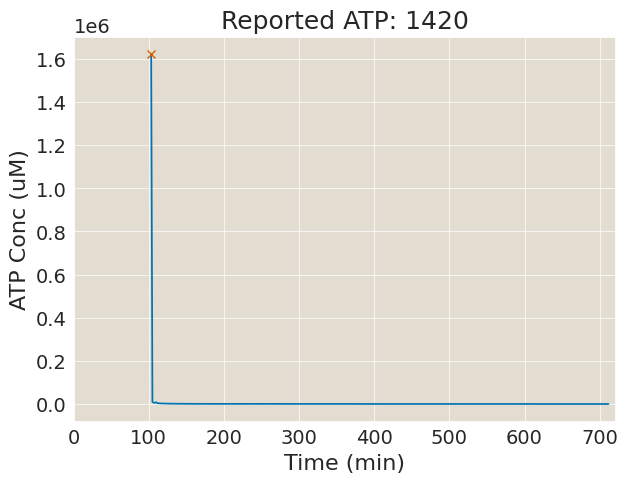

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

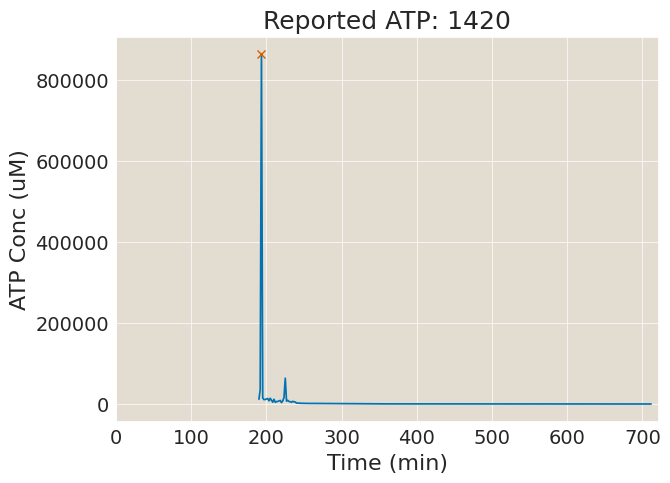

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

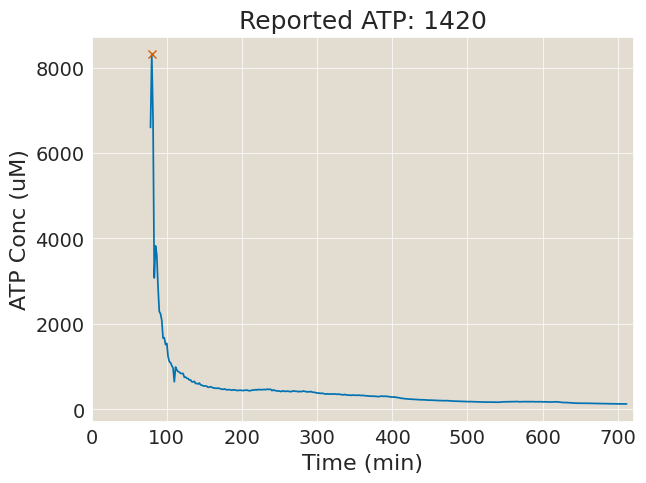

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

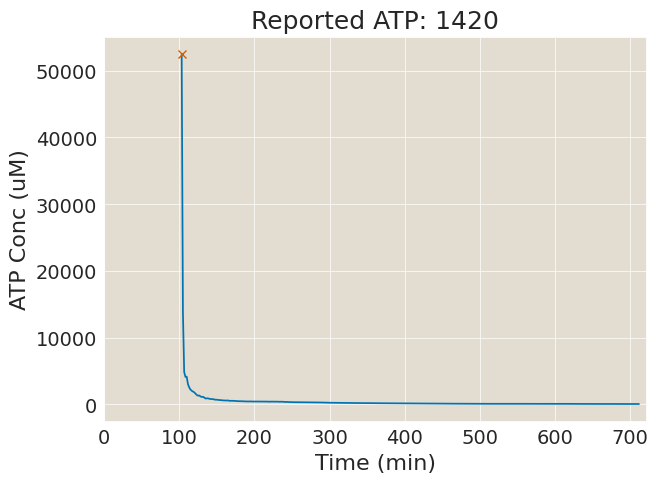

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

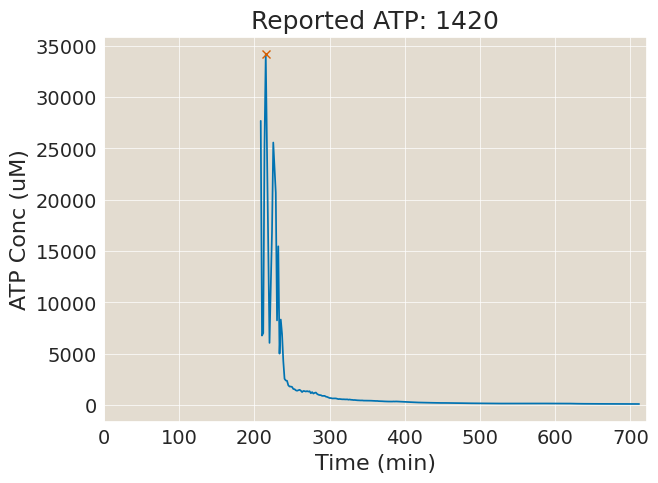

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

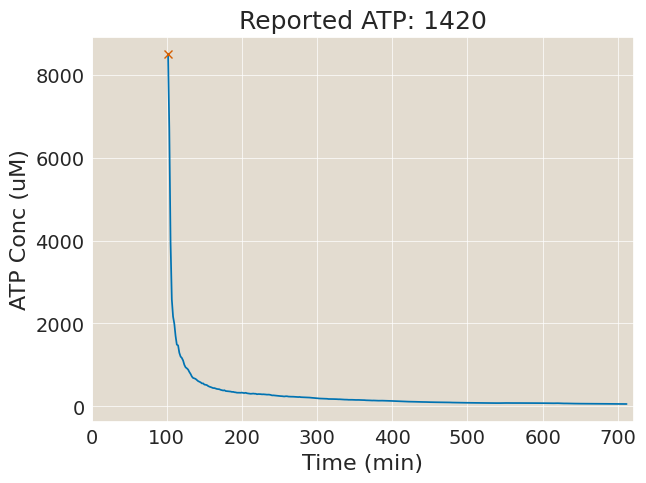

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

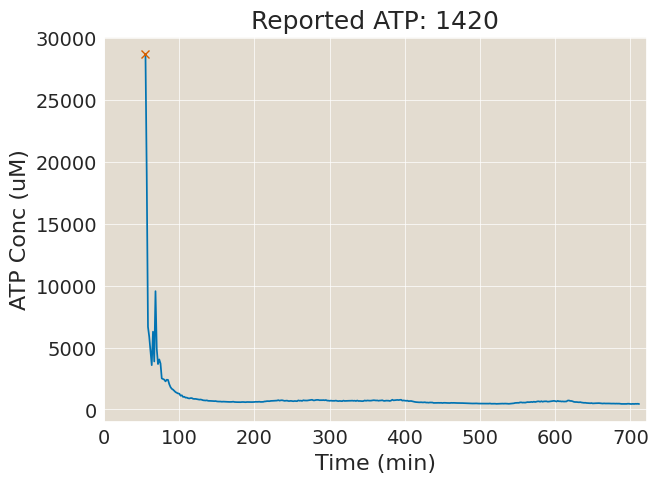

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

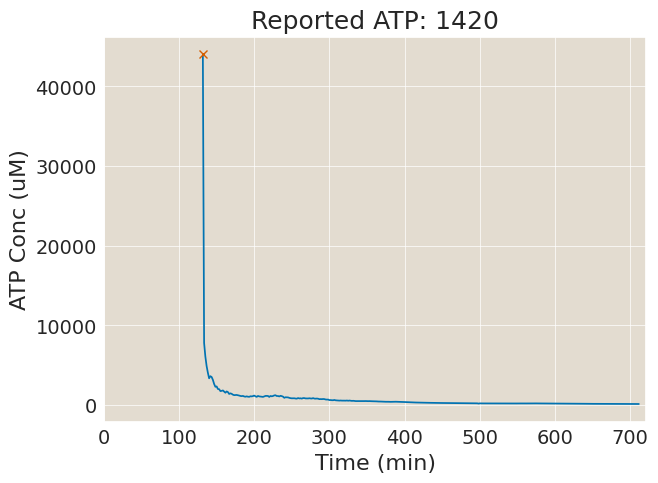

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

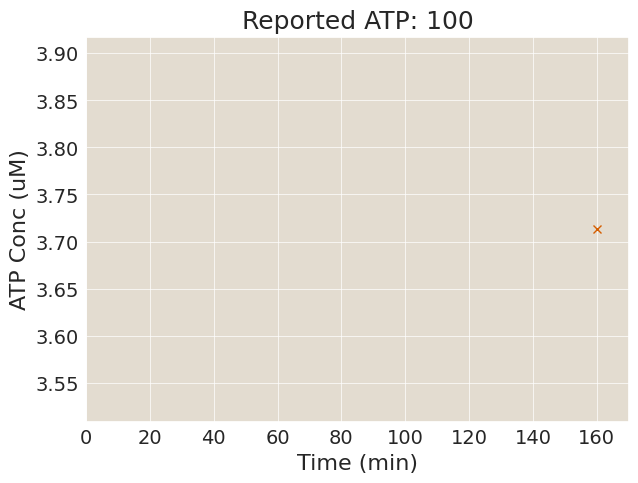

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

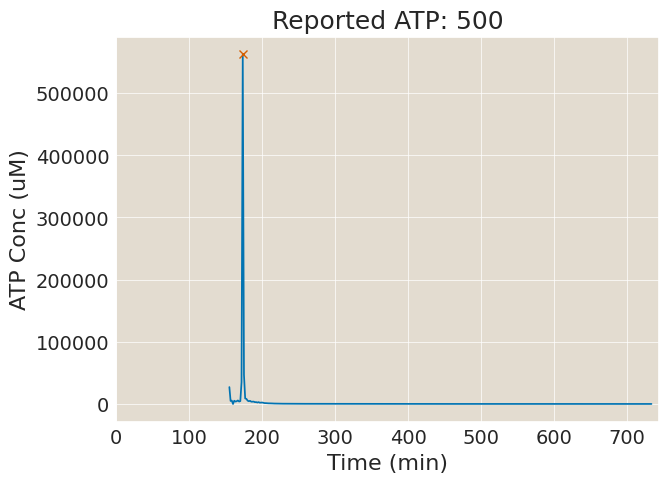

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

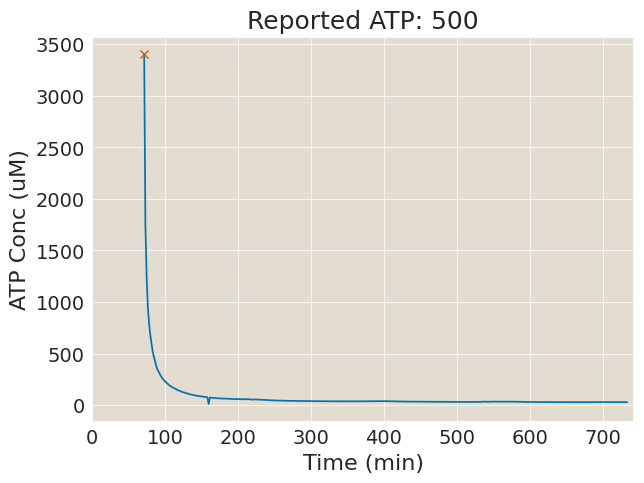

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

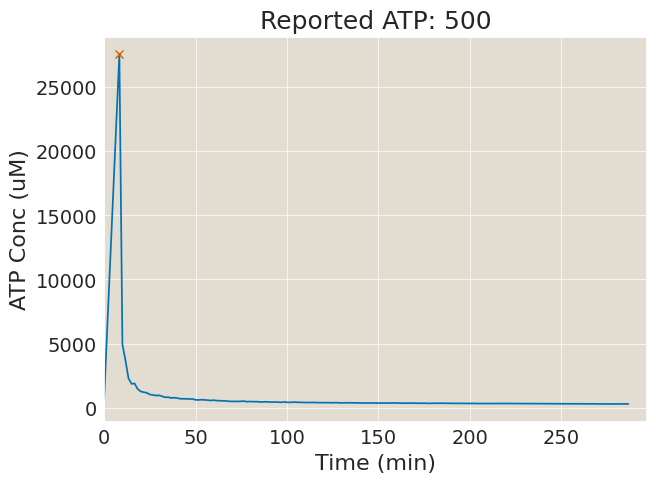

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

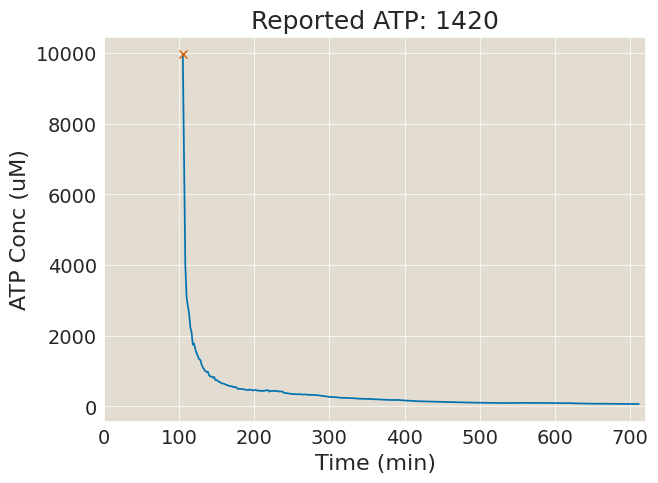

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

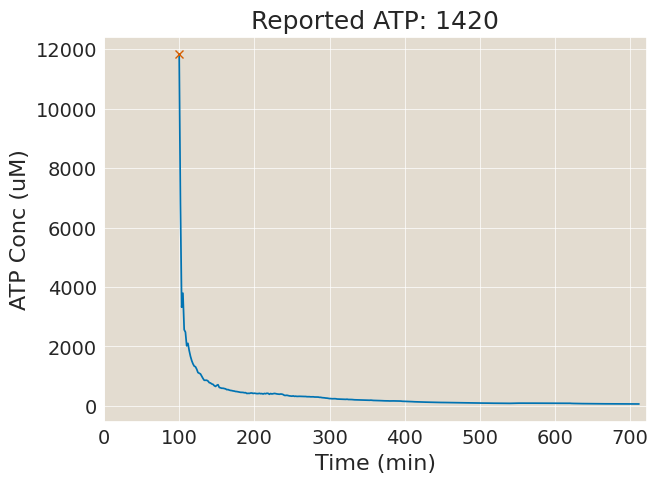

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

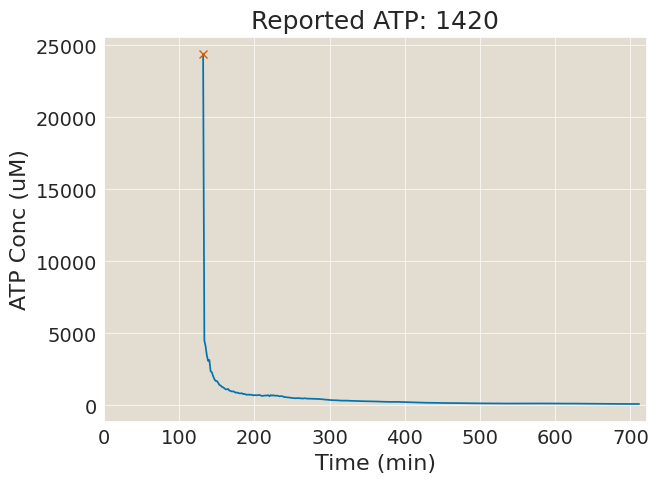

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

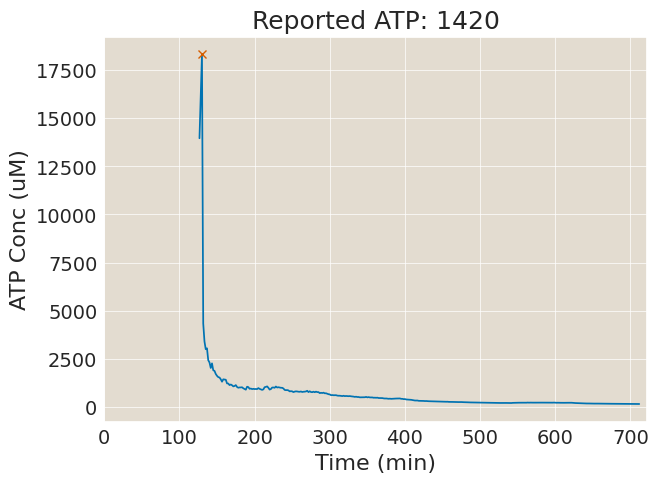

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

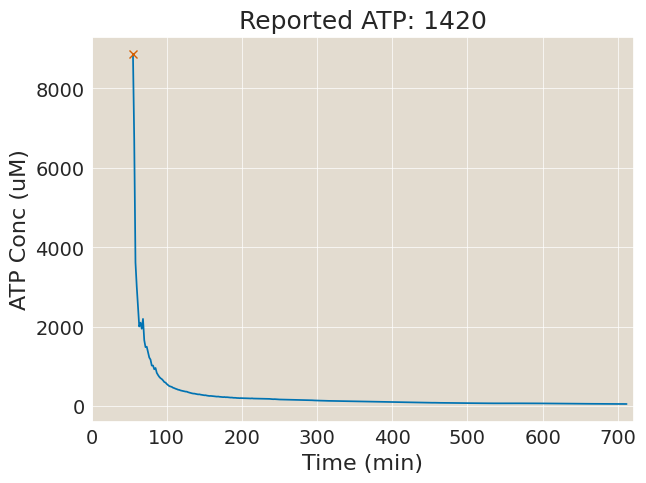

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

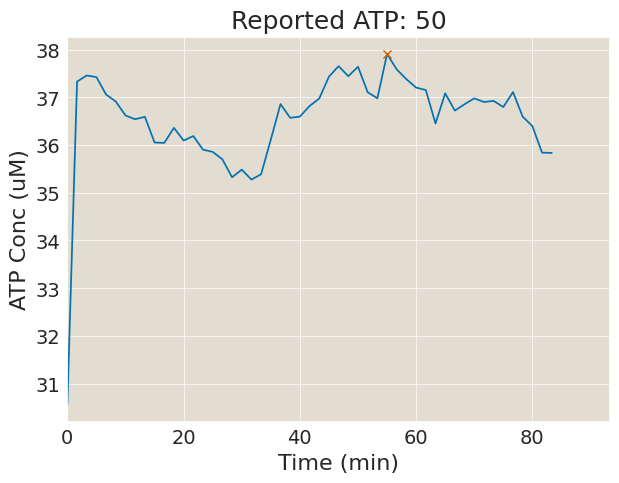

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

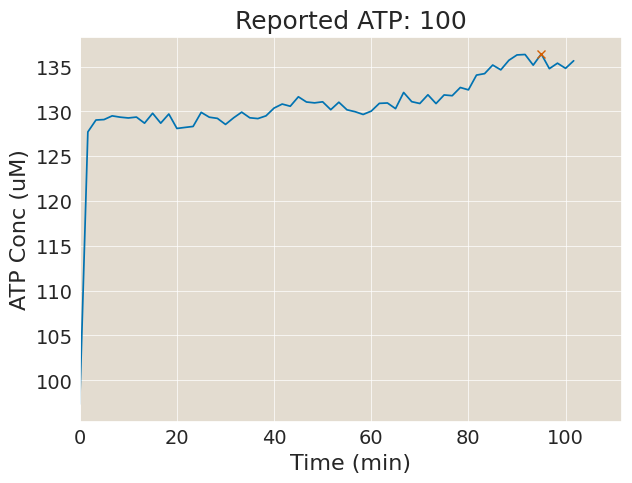

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

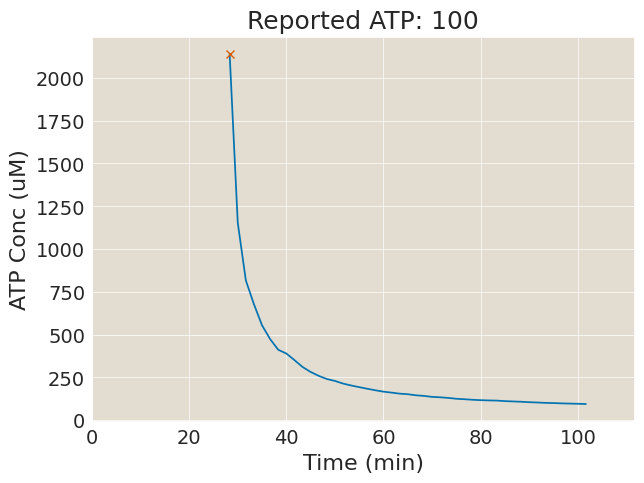

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

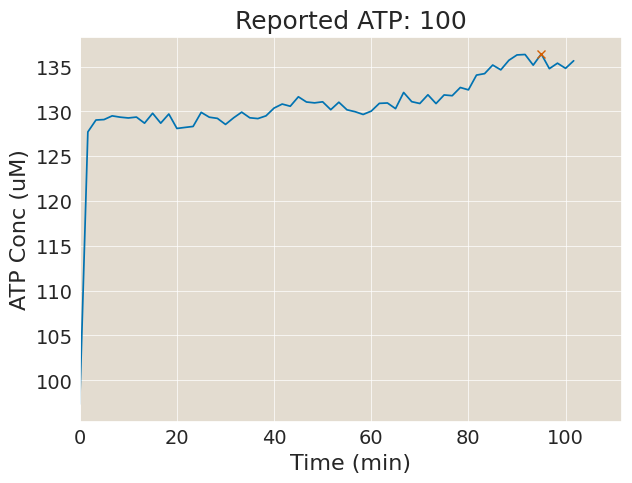

In [5]:
for i in max_too_late_indices: 
    plt.figure()
    plt.plot(np.array(times_list[i])/60, ATP_curve_list[i])
    plt.xlabel('Time (min)')
    plt.ylabel('ATP Conc (uM)')

    # Plot where max happens 
    max_index = np.where(ATP_curve_list[i] == np.amax(ATP_curve_list[i]))[0][0]; 
    plt.plot(times_list[i][max_index]/60, ATP_curve_list[i][max_index], 'xr')

    plt.xlim([0,times_list[i][-1]/60 + 10])
    plt.title(f'Reported ATP: {ATP_conc_list[i]}')

##### Hydrolysis Rates

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Lucida Sans Unicode' not found.
fin

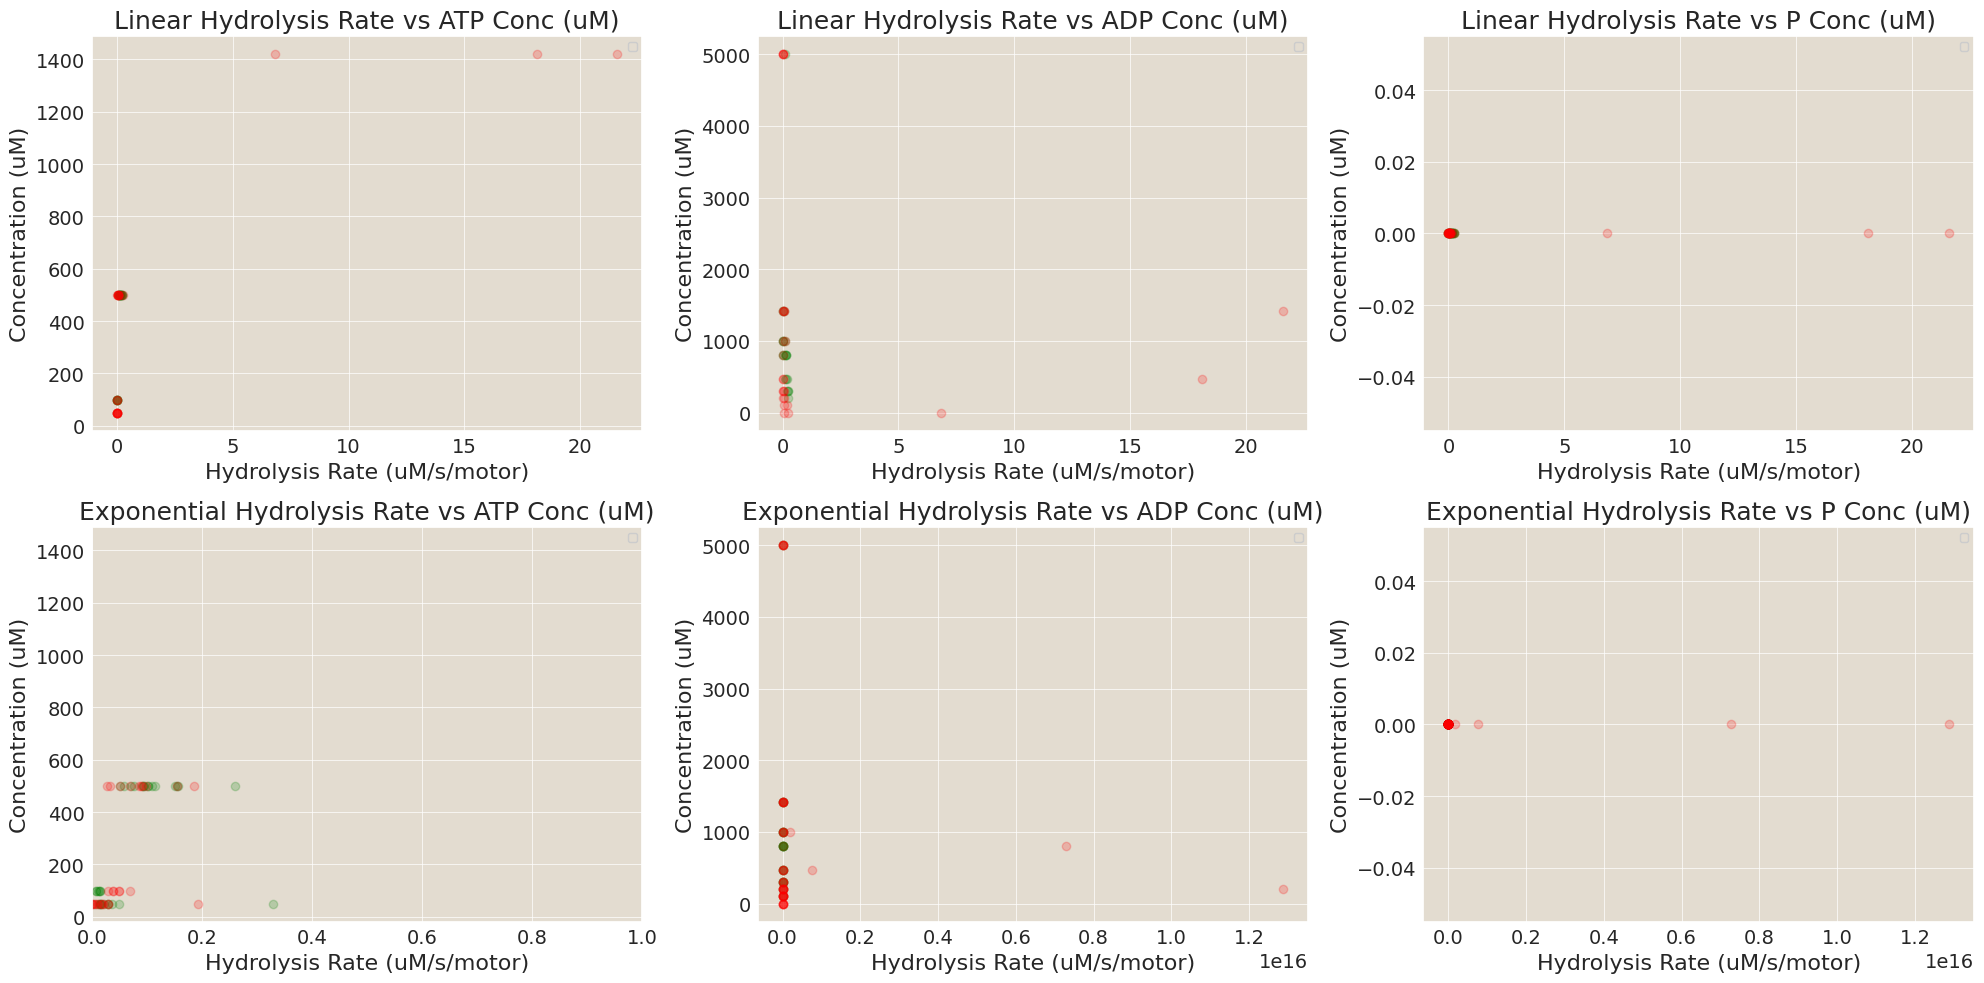

In [6]:
# Create three subplots in a row
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Scatter plots on each subplot
ax[0, 0].scatter(linear_hydrolysis_rate_list[accepted_indices], ATP_conc_list[accepted_indices], color='green', alpha = 0.2)
ax[0, 0].scatter(linear_hydrolysis_rate_list[rejected_indices], ATP_conc_list[rejected_indices], color='red', alpha = 0.2)

ax[0, 0].set_title('Linear Hydrolysis Rate vs ATP Conc (uM)')
ax[0, 0].legend()
ax[0, 0].set_xlabel('Hydrolysis Rate (uM/s/motor)')
ax[0, 0].set_ylabel('Concentration (uM)')

ax[0, 1].scatter(linear_hydrolysis_rate_list[accepted_indices], ADP_conc_list[accepted_indices], color='green', alpha = 0.2)
ax[0, 1].scatter(linear_hydrolysis_rate_list[rejected_indices], ADP_conc_list[rejected_indices], color='red', alpha = 0.2)
ax[0, 1].set_title('Linear Hydrolysis Rate vs ADP Conc (uM)')
ax[0, 1].legend()
ax[0, 1].set_xlabel('Hydrolysis Rate (uM/s/motor)')
ax[0, 1].set_ylabel('Concentration (uM)')

ax[0, 2].scatter(linear_hydrolysis_rate_list[accepted_indices], P_conc_list[accepted_indices], color='green', alpha = 0.2)
ax[0, 2].scatter(linear_hydrolysis_rate_list[rejected_indices], P_conc_list[rejected_indices], color='red', alpha = 0.2)
ax[0, 2].set_title('Linear Hydrolysis Rate vs P Conc (uM)')
ax[0, 2].legend()
ax[0, 2].set_xlabel('Hydrolysis Rate (uM/s/motor)')
ax[0, 2].set_ylabel('Concentration (uM)')


# Scatter plots on each subplot
ax[1, 0].scatter(exponential_hydrolysis_rate_list[accepted_indices], ATP_conc_list[accepted_indices], color='green', alpha = 0.2)
ax[1, 0].scatter(exponential_hydrolysis_rate_list[rejected_indices], ATP_conc_list[rejected_indices], color='red', alpha = 0.2)
ax[1, 0].set_title('Exponential Hydrolysis Rate vs ATP Conc (uM)')
ax[1, 0].legend()
ax[1, 0].set_xlabel('Hydrolysis Rate (uM/s/motor)')
ax[1, 0].set_ylabel('Concentration (uM)')
ax[1, 0].set_xlim([0,1])

ax[1, 1].scatter(exponential_hydrolysis_rate_list[accepted_indices], ADP_conc_list[accepted_indices], color='green', alpha = 0.2)
ax[1, 1].scatter(exponential_hydrolysis_rate_list[rejected_indices], ADP_conc_list[rejected_indices], color='red', alpha = 0.2)
ax[1, 1].set_title('Exponential Hydrolysis Rate vs ADP Conc (uM)')
ax[1, 1].legend()
ax[1, 1].set_xlabel('Hydrolysis Rate (uM/s/motor)')
ax[1, 1].set_ylabel('Concentration (uM)')

ax[1, 2].scatter(exponential_hydrolysis_rate_list[accepted_indices], P_conc_list[accepted_indices], color='green', alpha = 0.2)
ax[1, 2].scatter(exponential_hydrolysis_rate_list[rejected_indices], P_conc_list[rejected_indices], color='red', alpha = 0.2)
ax[1, 2].set_title('Exponential Hydrolysis Rate vs P Conc (uM)')
ax[1, 2].legend()
ax[1, 2].set_xlabel('Hydrolysis Rate (uM/s/motor)')
ax[1, 2].set_ylabel('Concentration (uM)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the scatter plots
plt.show()


##### Goodness of Fits

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Lucida Sans Unicode' not found.
fin

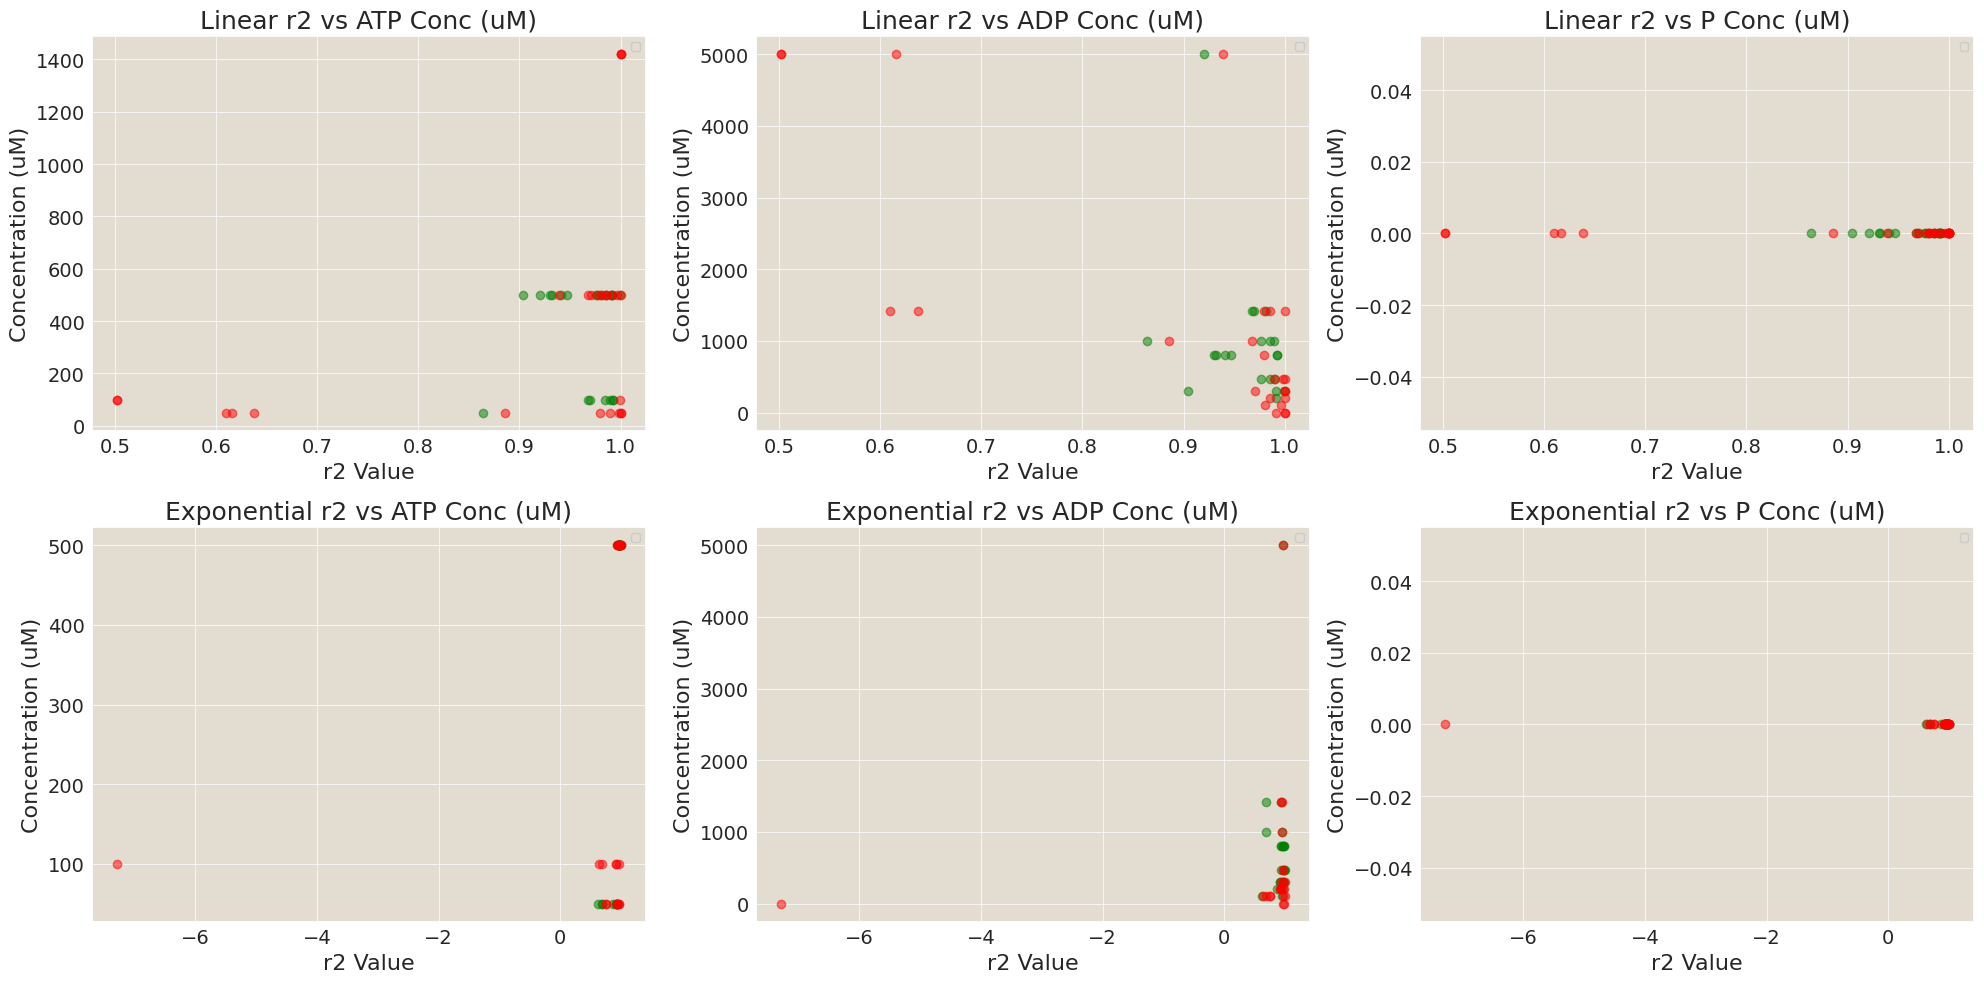

In [7]:
# Create three subplots in a row
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Scatter plots on each subplot
ax[0, 0].scatter(linear_r2_list[accepted_indices], ATP_conc_list[accepted_indices], color='green', alpha = 0.5)
ax[0, 0].scatter(linear_r2_list[rejected_indices], ATP_conc_list[rejected_indices], color='red', alpha = 0.5)

ax[0, 0].set_title('Linear r2 vs ATP Conc (uM)')
ax[0, 0].legend()
ax[0, 0].set_xlabel('r2 Value')
ax[0, 0].set_ylabel('Concentration (uM)')

ax[0, 1].scatter(linear_r2_list[accepted_indices], ADP_conc_list[accepted_indices], color='green', alpha = 0.5)
ax[0, 1].scatter(linear_r2_list[rejected_indices], ADP_conc_list[rejected_indices], color='red', alpha = 0.5)
ax[0, 1].set_title('Linear r2 vs ADP Conc (uM)')
ax[0, 1].legend()
ax[0, 1].set_xlabel('r2 Value')
ax[0, 1].set_ylabel('Concentration (uM)')

ax[0, 2].scatter(linear_r2_list[accepted_indices], P_conc_list[accepted_indices], color='green', alpha = 0.5)
ax[0, 2].scatter(linear_r2_list[rejected_indices], P_conc_list[rejected_indices], color='red', alpha = 0.5)
ax[0, 2].set_title('Linear r2 vs P Conc (uM)')
ax[0, 2].legend()
ax[0, 2].set_xlabel('r2 Value')
ax[0, 2].set_ylabel('Concentration (uM)')


# Scatter plots on each subplot
ax[1, 0].scatter(exponential_r2_list[accepted_indices], ATP_conc_list[accepted_indices], color='green', alpha = 0.5)
ax[1, 0].scatter(exponential_r2_list[rejected_indices], ATP_conc_list[rejected_indices], color='red', alpha = 0.5)
ax[1, 0].set_title('Exponential r2 vs ATP Conc (uM)')
ax[1, 0].legend()
ax[1, 0].set_xlabel('r2 Value')
ax[1, 0].set_ylabel('Concentration (uM)')

ax[1, 1].scatter(exponential_r2_list[accepted_indices], ADP_conc_list[accepted_indices], color='green', alpha = 0.5)
ax[1, 1].scatter(exponential_r2_list[rejected_indices], ADP_conc_list[rejected_indices], color='red', alpha = 0.5)
ax[1, 1].set_title('Exponential r2 vs ADP Conc (uM)')
ax[1, 1].legend()
ax[1, 1].set_xlabel('r2 Value')
ax[1, 1].set_ylabel('Concentration (uM)')

ax[1, 2].scatter(exponential_r2_list[accepted_indices], P_conc_list[accepted_indices], color='green', alpha = 0.5)
ax[1, 2].scatter(exponential_r2_list[rejected_indices], P_conc_list[rejected_indices], color='red', alpha = 0.5)
ax[1, 2].set_title('Exponential r2 vs P Conc (uM)')
ax[1, 2].legend()
ax[1, 2].set_xlabel('r2 Value')
ax[1, 2].set_ylabel('Concentration (uM)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the scatter plots
plt.show()


##### Noise Vs ATP, ADP, P

In [8]:
noise = np.array([np.std(curve) for curve in ATP_curve_list]); 

/Users/mashok/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mashok/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/mashok/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans

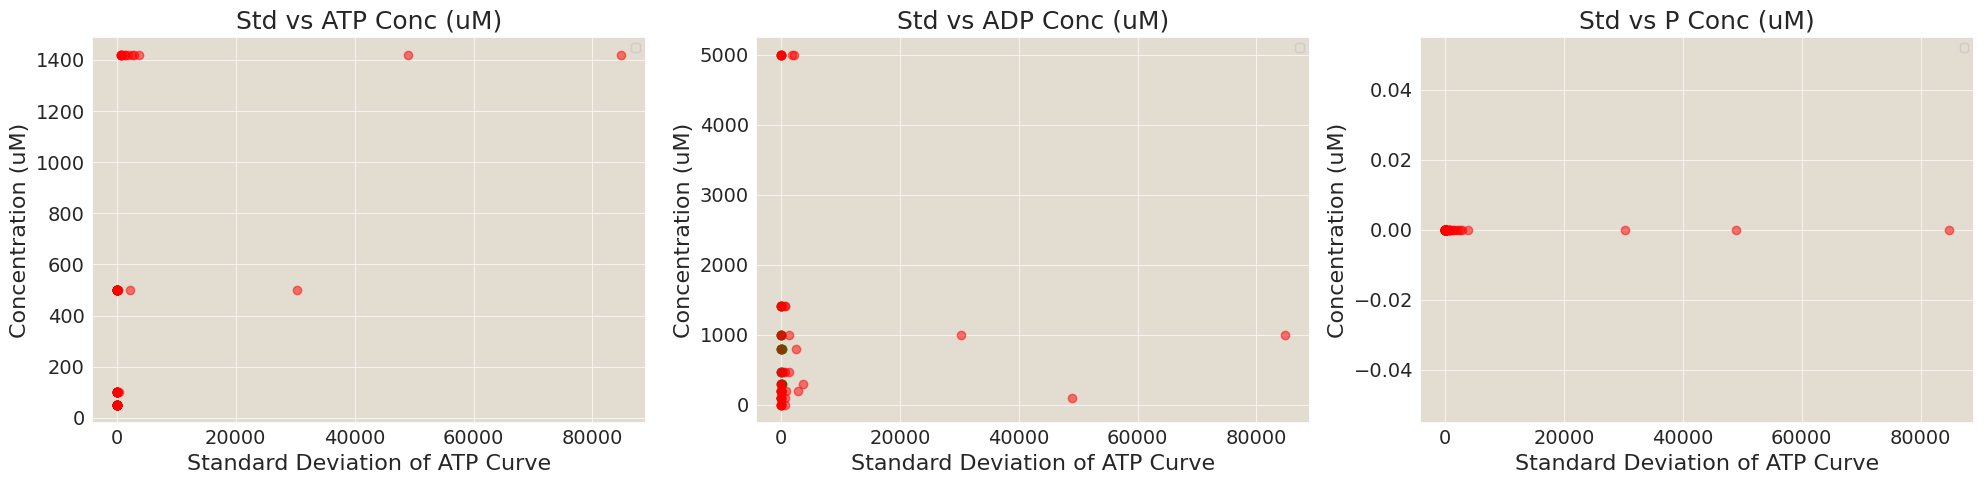

In [9]:
# Create three subplots in a row
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Scatter plots on each subplot
ax[0].scatter(noise[accepted_indices], ATP_conc_list[accepted_indices], color='green', alpha = 0.5)
ax[0].scatter(noise[rejected_indices], ATP_conc_list[rejected_indices], color='red', alpha = 0.5)
ax[0].set_title('Std vs ATP Conc (uM)')
ax[0].legend()
ax[0].set_xlabel('Standard Deviation of ATP Curve')
ax[0].set_ylabel('Concentration (uM)')
# ax[0].set_xscale('log')

ax[1].scatter(noise[accepted_indices], ADP_conc_list[accepted_indices], color='green', alpha = 0.5)
ax[1].scatter(noise[rejected_indices], ADP_conc_list[rejected_indices], color='red', alpha = 0.5)
ax[1].set_title('Std vs ADP Conc (uM)')
ax[1].legend()
ax[1].set_xlabel('Standard Deviation of ATP Curve')
ax[1].set_ylabel('Concentration (uM)')
# ax[1].set_xscale('log')

ax[2].scatter(noise[accepted_indices], P_conc_list[accepted_indices], color='green', alpha = 0.5)
ax[2].scatter(noise[rejected_indices], P_conc_list[rejected_indices], color='red', alpha = 0.5)
ax[2].set_title('Std vs P Conc (uM)')
ax[2].legend()
ax[2].set_xlabel('Standard Deviation of ATP Curve')
ax[2].set_ylabel('Concentration (uM)')
# ax[2].set_xscale('log')

# Adjust layout for better spacing
plt.tight_layout()

# Show the scatter plots
plt.show()


#### List of entries with low goodness of fit

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

[4 5 6]


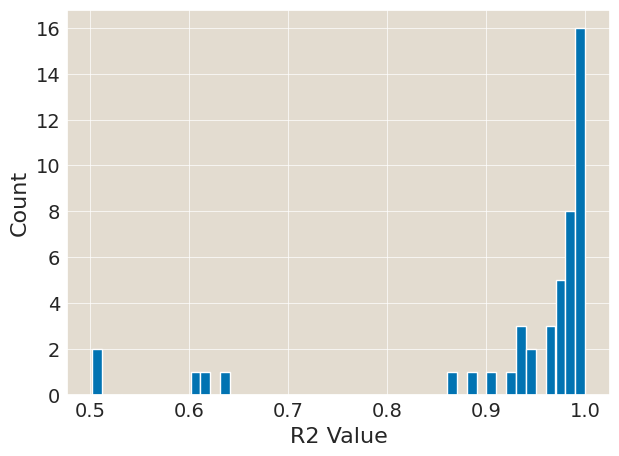

In [10]:
linear_r2_list = df["r-squared for linear fit"]
plt.hist(linear_r2_list, bins = 50)
plt.xlabel('R2 Value')
plt.ylabel('Count')

low_linear_r2_list_index = np.where(linear_r2_list > 0.95)[0]; 
print(low_linear_r2_list_index[:3])

Plot ATP curves for low goodness of fit

4
[200, 400, 2]
5
[200, 400, 2]
6
[200, 900, 7]
8
[200, 1700, 15]
9
[18000, 18200, 2]
15
[6100, 6300, 2]
36
[200, 900, 7]


/var/folders/f0/pddct2nd5dxf7qtf3z57b8_c0000gn/T/ipykernel_40096/3076283041.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
findfont: Font family 'Lucida Sans Unicode' not found.


38
[200, 900, 7]
39
[200, 2100, 19]
40
[200, 1100, 9]
41
[300, 1200, 9]
42
[300, 1400, 11]
46
[200, 400, 2]
47
[200, 500, 3]
48
[200, 500, 3]
49
[200, 700, 5]
50
[200, 1100, 9]
51
[200, 1600, 14]
56
[200, 700, 5]
57
[200, 700, 5]
59
[200, 900, 7]
60
[200, 1300, 11]
62
[200, 500, 3]
68
[3300, 3500, 2]
71
[200, 900, 7]
80
[200, 2700, 25]
81
[200, 5300, 51]
84
[200, 1700, 15]
86
[200, 2700, 25]
88
[200, 5700, 55]
90
[200, 600, 4]
93
[200, 1700, 15]


findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

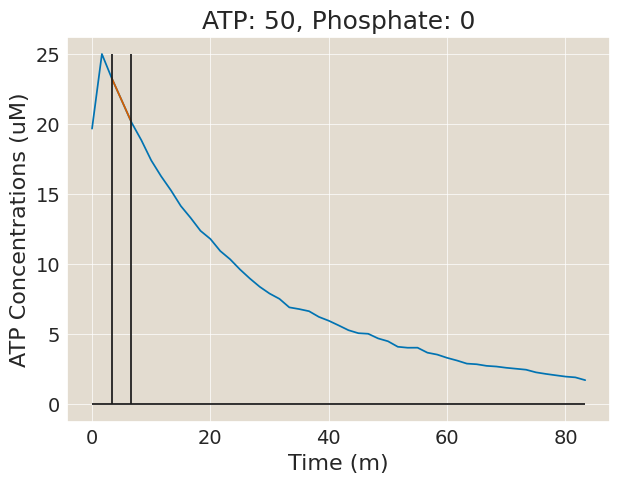

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

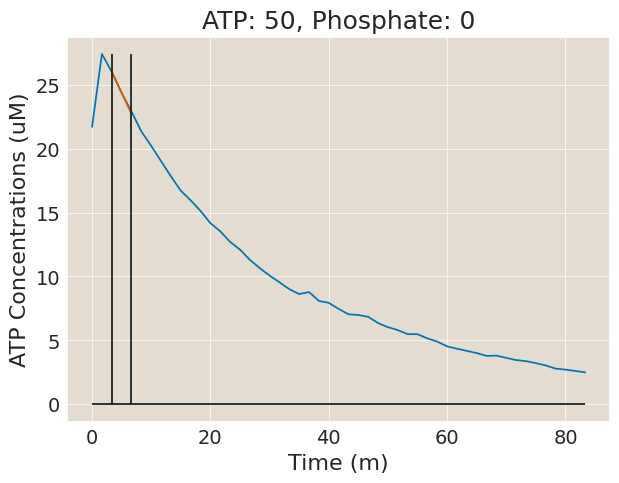

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

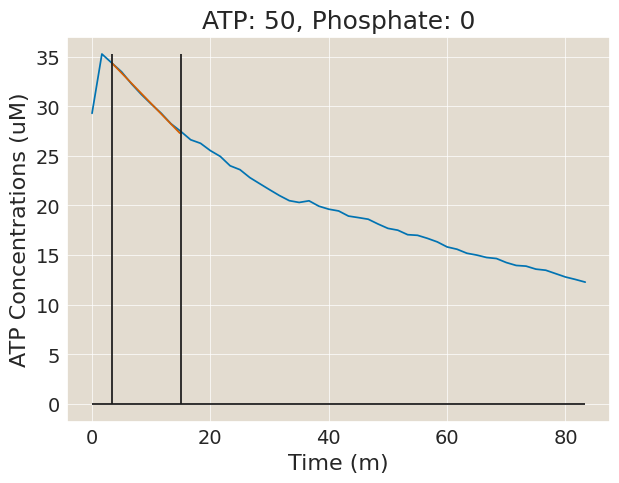

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

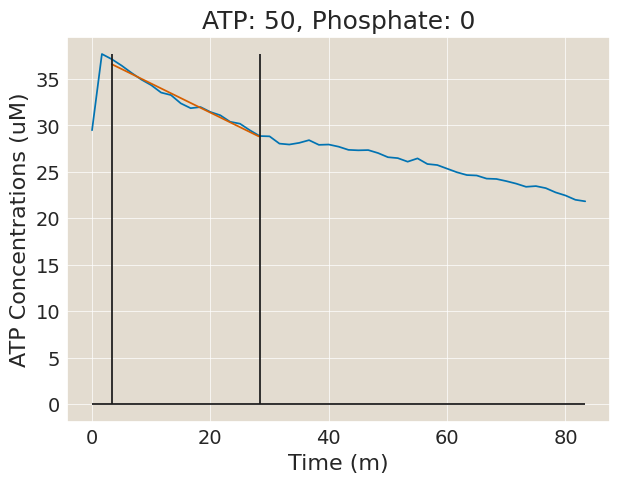

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

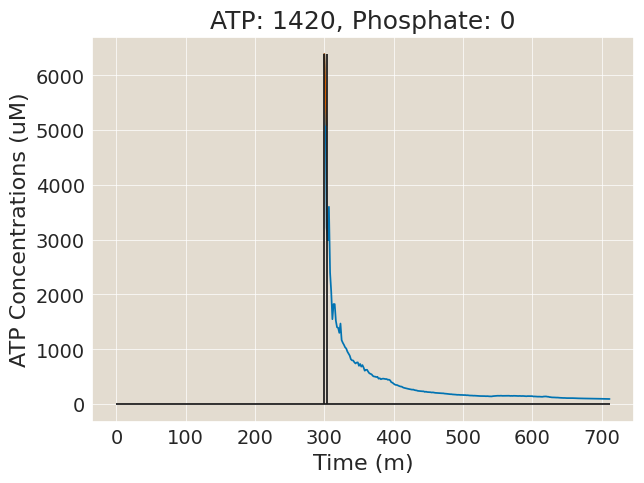

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

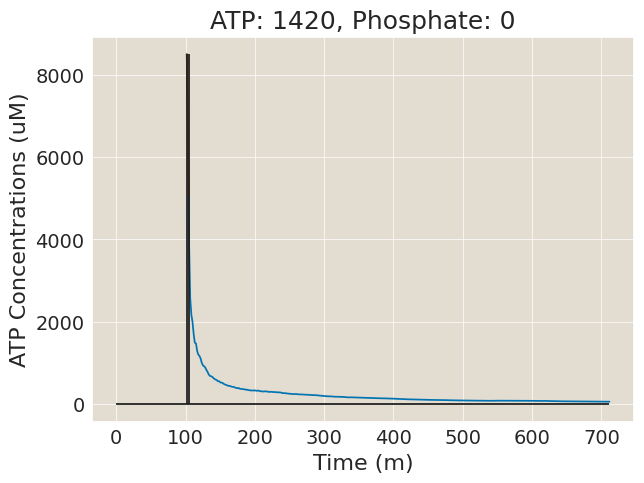

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

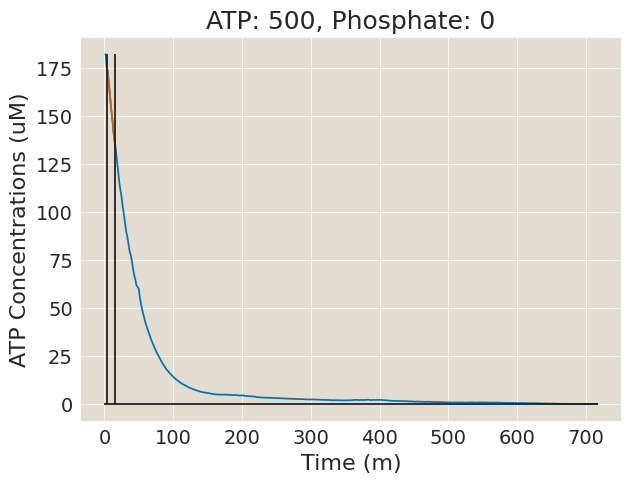

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

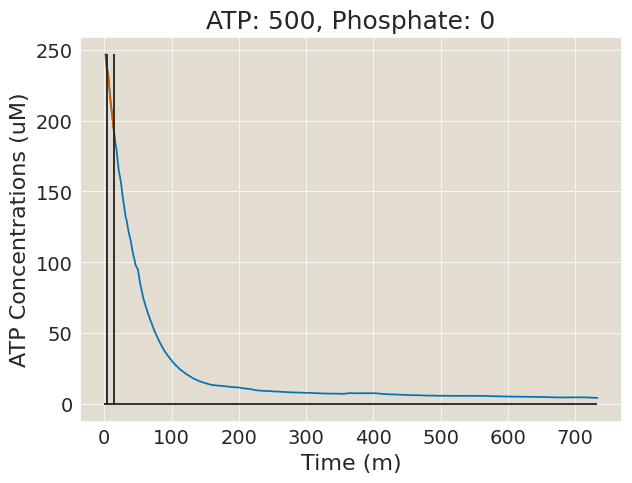

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

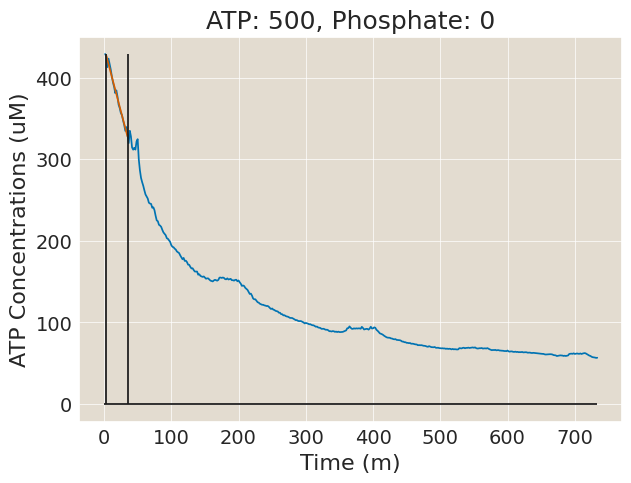

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

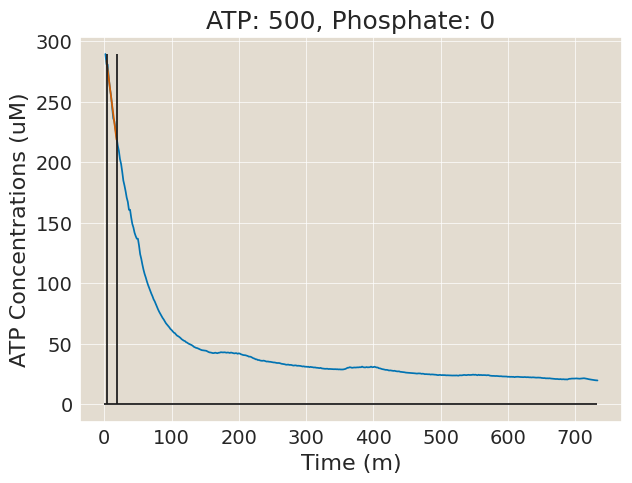

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

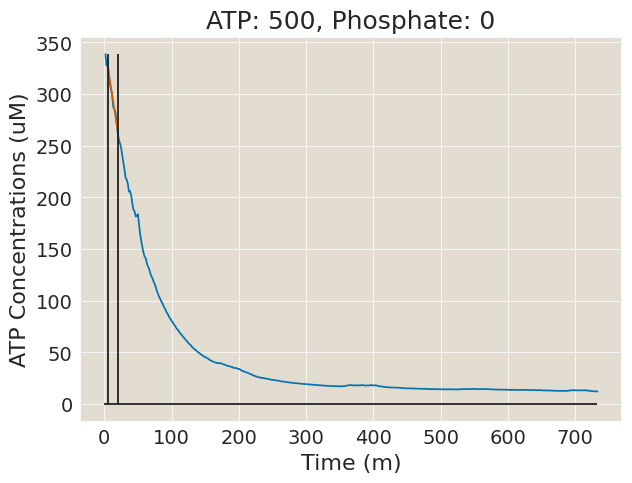

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

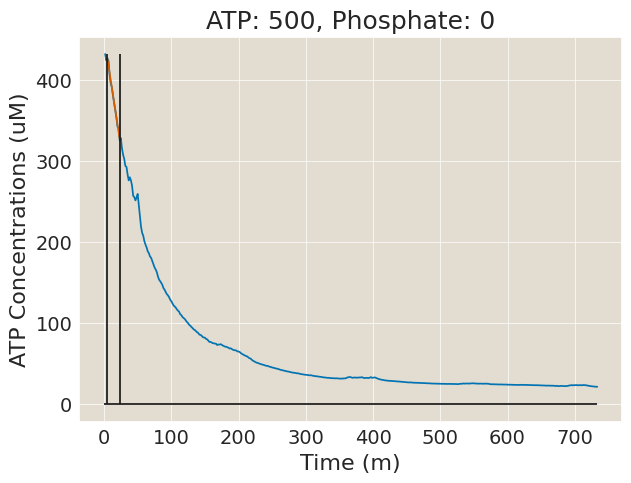

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

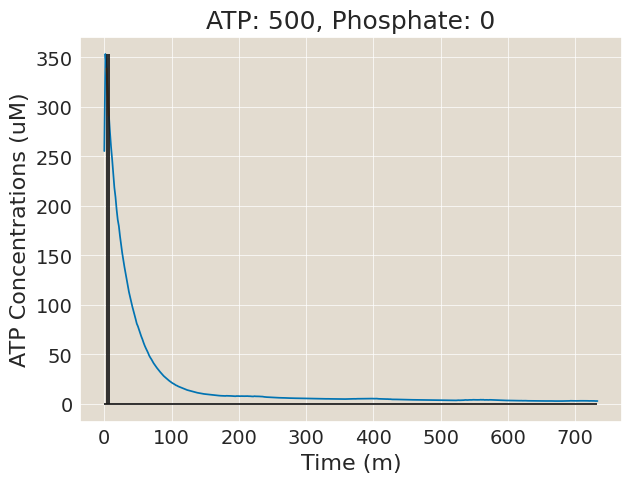

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

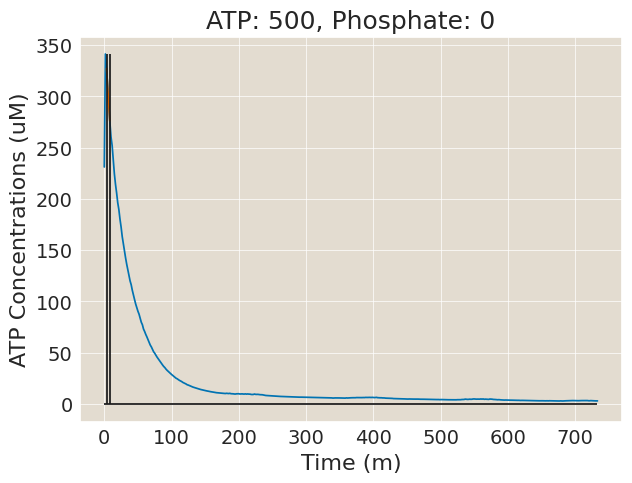

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

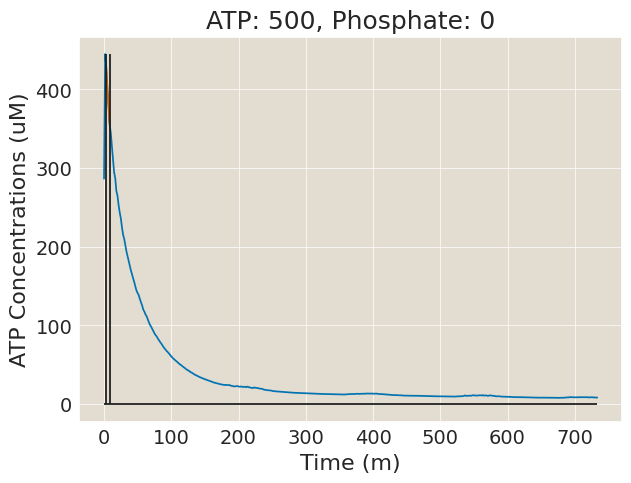

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

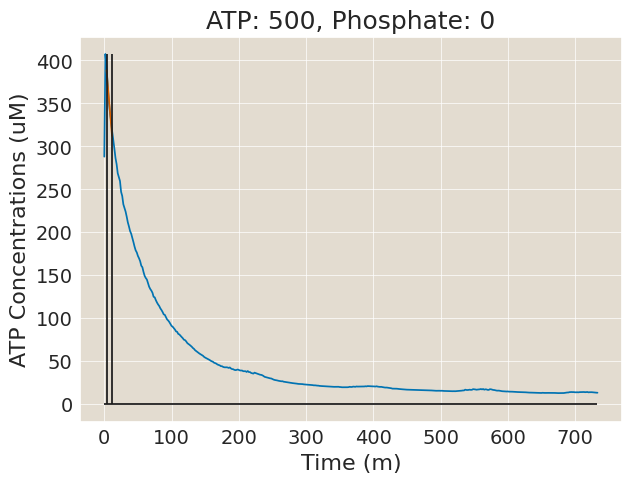

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

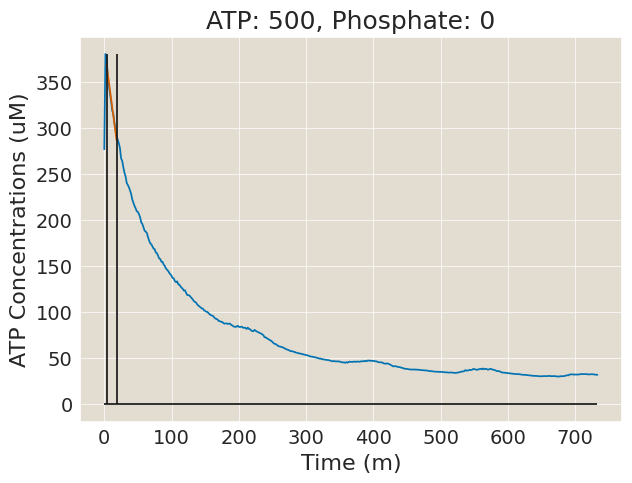

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

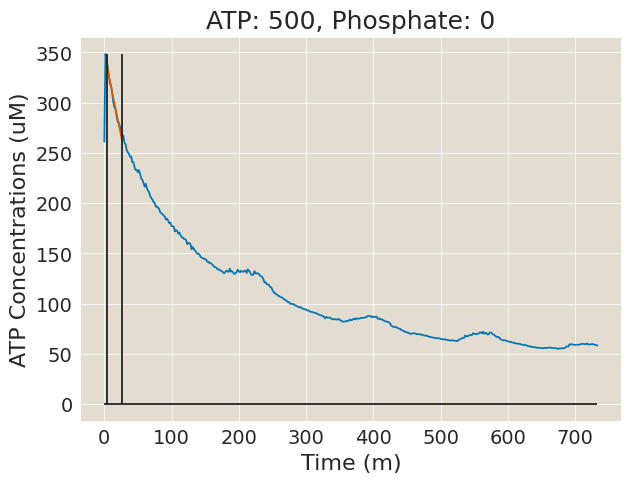

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

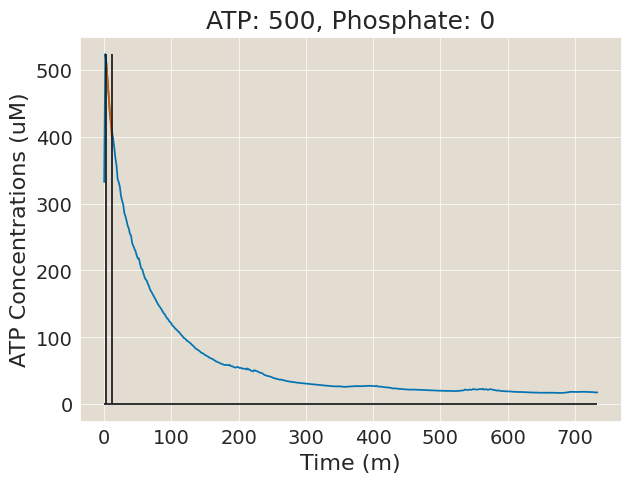

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

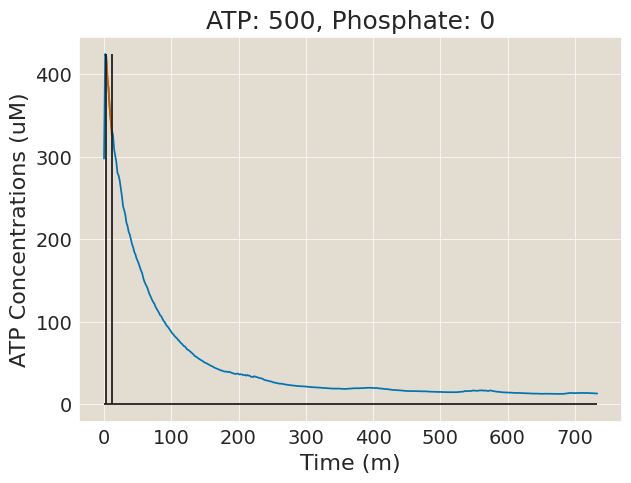

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

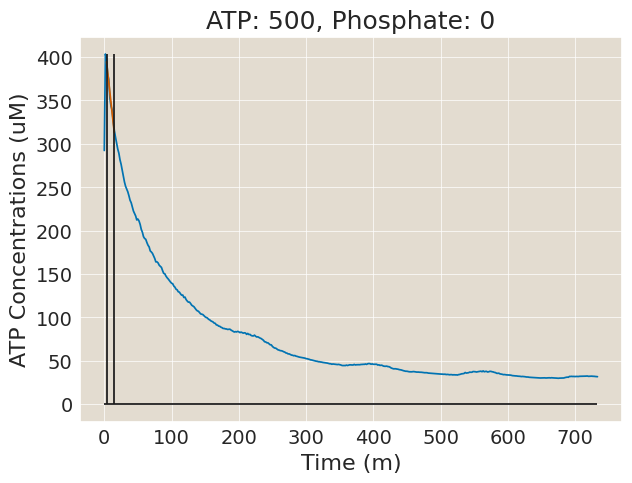

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

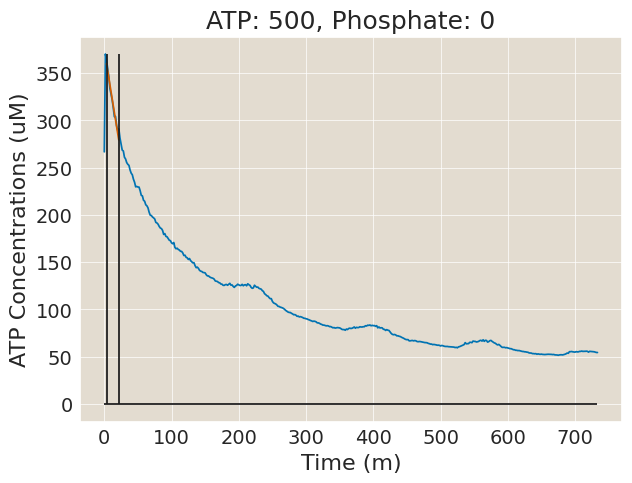

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

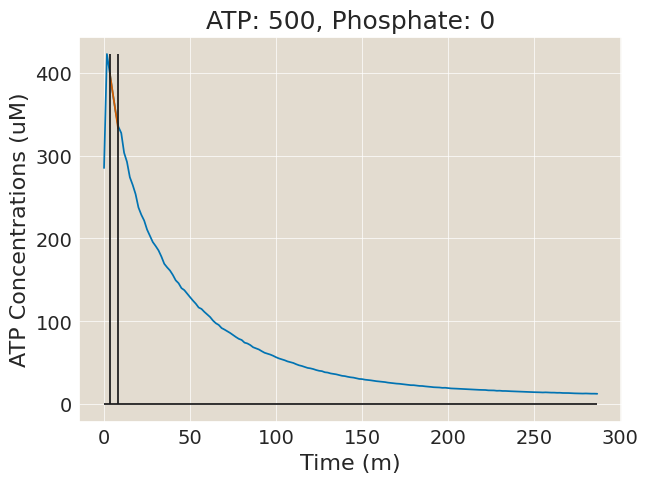

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

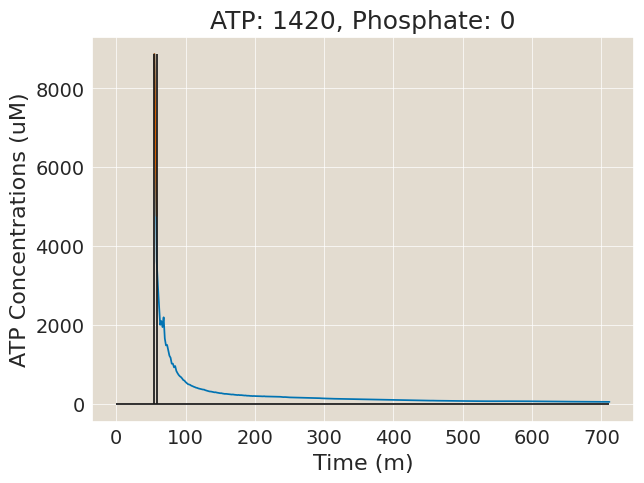

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

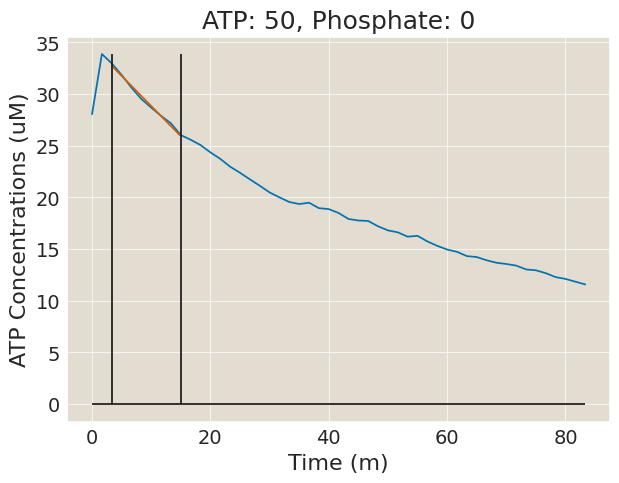

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

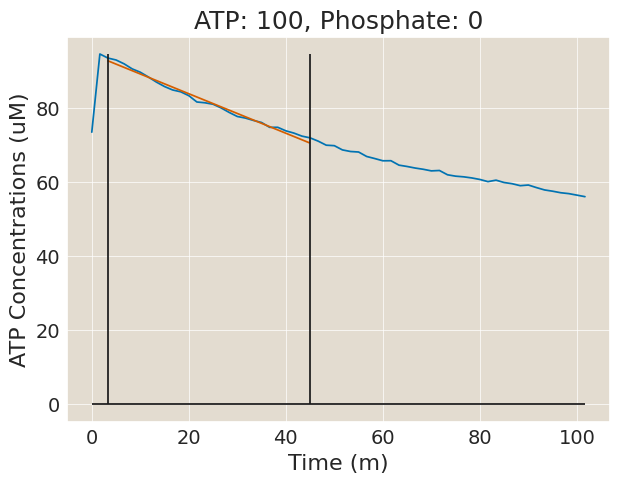

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

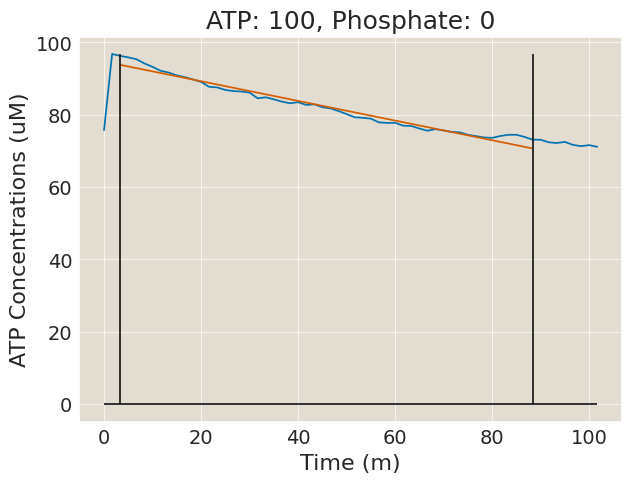

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

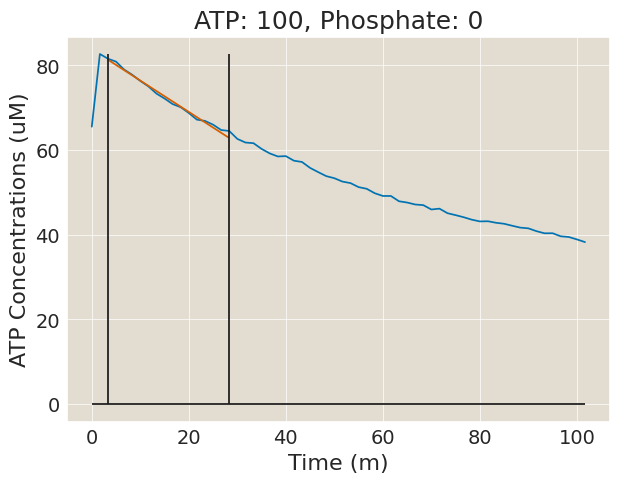

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

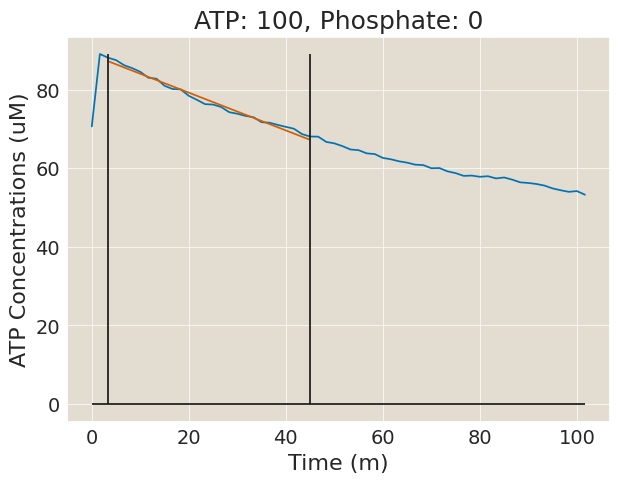

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

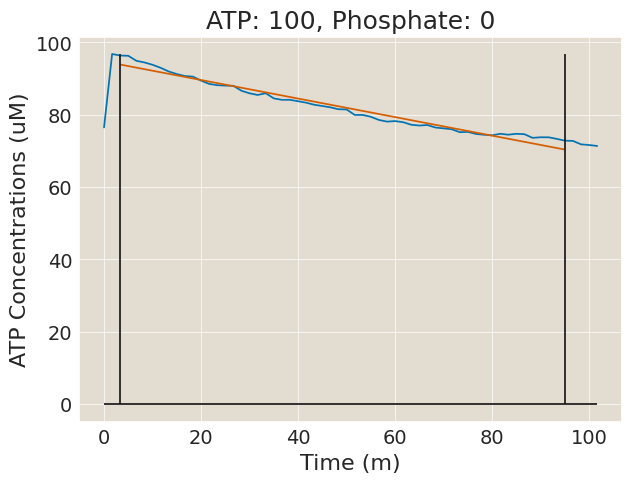

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

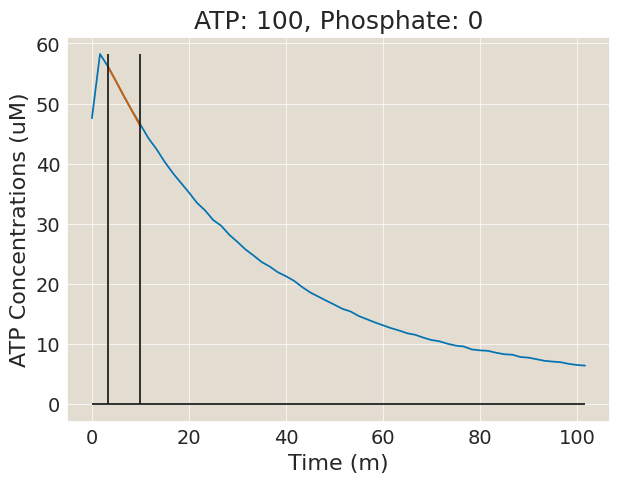

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

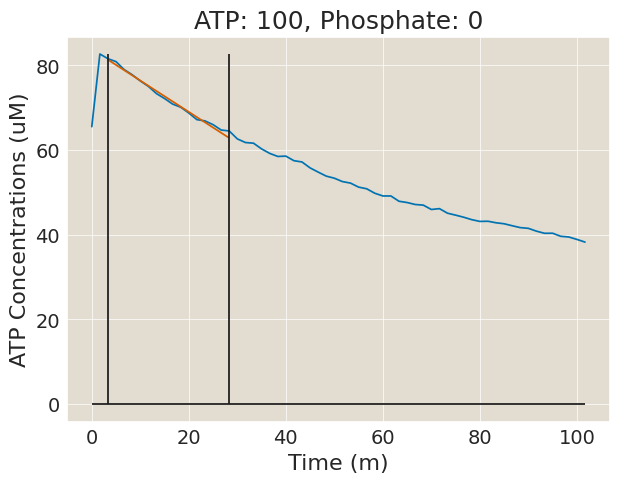

In [11]:
for i in low_linear_r2_list_index:
    print(i)
    time = ast.literal_eval(df["Time Array (s)"][i])
    ATP_curve = ast.literal_eval(df["ATP Curve (uM)"][i])

    ATP_conc = df["ATP Concentration (uM)"][i]
    Phosphate_conc = df["P Concentration (uM)"][i]

    linear_params = ast.literal_eval(df["Linear Data Regime (start and end time in seconds)"][i])
    start_time = linear_params[0]; 
    end_time = linear_params[1]; 

    linear_rate = - df["Hydrolysis Rate (uM/s/motor) from Linear Fitting (-abs(Slope)/Motconc)"][i]
    linear_y_intercept = df["Y-intercept of Linear Curve from Linear Fitting"][i]
    fitted_curve = atp_hydro.linearfunc(np.arange(start_time, end_time, 10), linear_rate, linear_y_intercept);

    print(linear_params)
    plt.figure()
    plt.plot(np.array(time)/60, ATP_curve)
    plt.plot(np.arange(start_time, end_time, 10)/60, fitted_curve, '-r')
    plt.xlabel('Time (m)')
    plt.ylabel('ATP Concentrations (uM)')
    plt.vlines(start_time/60, 0, np.amax(ATP_curve), 'k')
    plt.vlines(end_time/60, 0, np.amax(ATP_curve), 'k')
    plt.title(f'ATP: {ATP_conc}, Phosphate: {Phosphate_conc}')
    plt.hlines(np.amax(ATP_curve)*0., 0, np.amax(time)/60, 'k')

In [12]:
exp_r2_list = df["r-squared for exponential fit"]
# plt.hist(np.array(exp_r2_list), bins = 50)
# plt.xlabel('R2 Value')
# plt.ylabel('Count')

print('all', exp_r2_list)

low_exp_r2_list_index = np.where(exp_r2_list > 0.95)[0]; 
print(low_linear_r2_list_index)

all 0          NaN
1          NaN
2     0.754104
3          NaN
4     0.927657
        ...   
89    0.917834
90    0.967146
91         NaN
92         NaN
93         NaN
Name: r-squared for exponential fit, Length: 94, dtype: float64
[ 4  5  6  8  9 15 36 38 39 40 41 42 46 47 48 49 50 51 56 57 59 60 62 68
 71 80 81 84 86 88 90 93]


/var/folders/f0/pddct2nd5dxf7qtf3z57b8_c0000gn/T/ipykernel_40096/1731727616.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unic

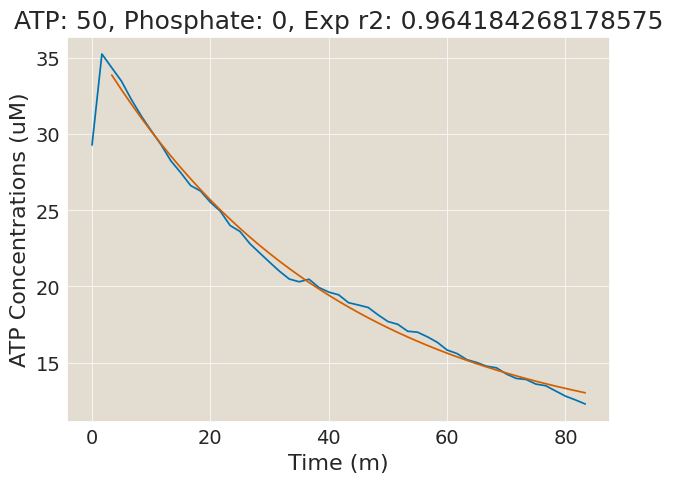

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

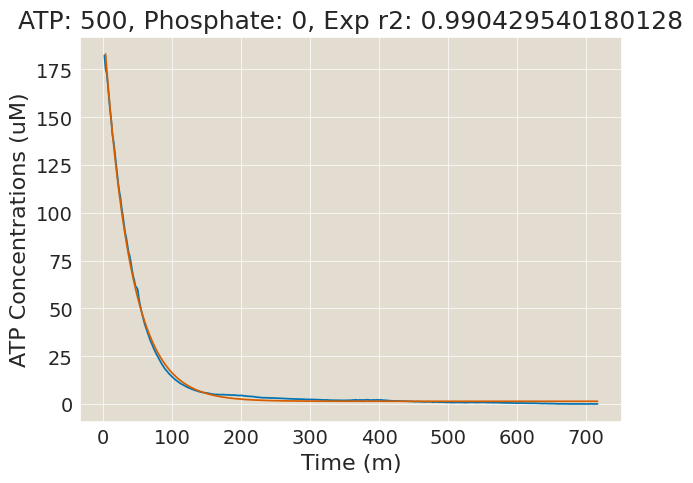

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

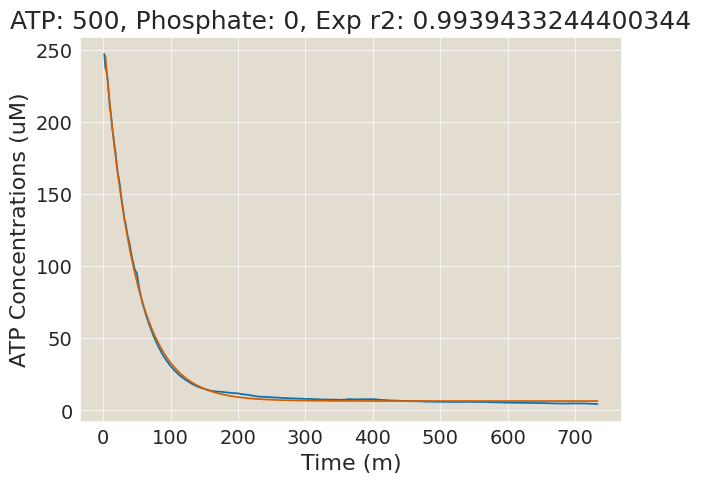

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

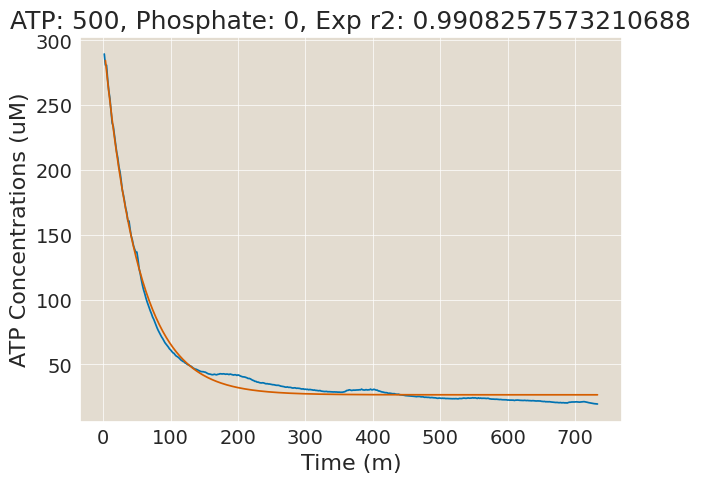

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

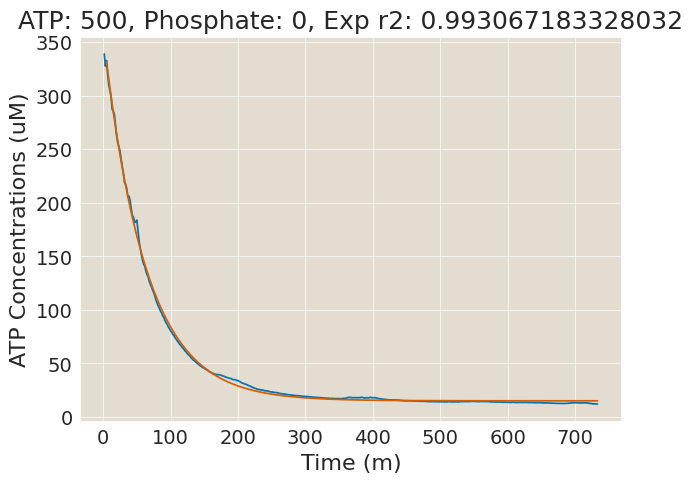

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

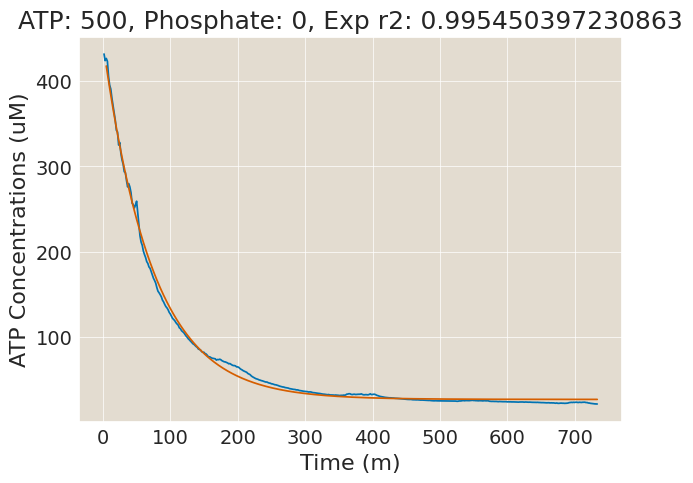

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

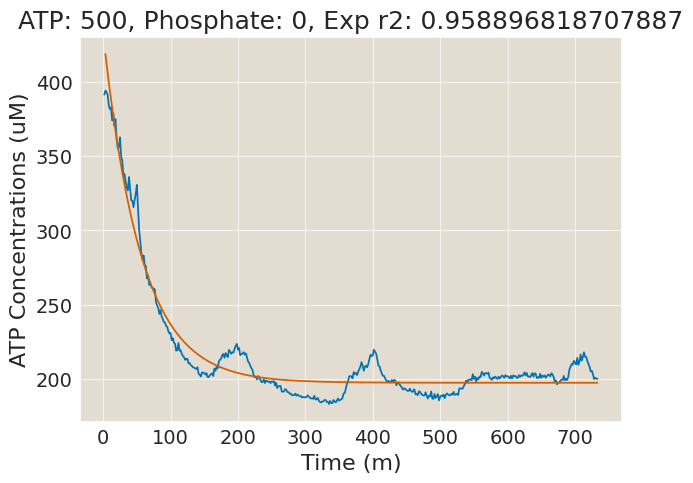

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

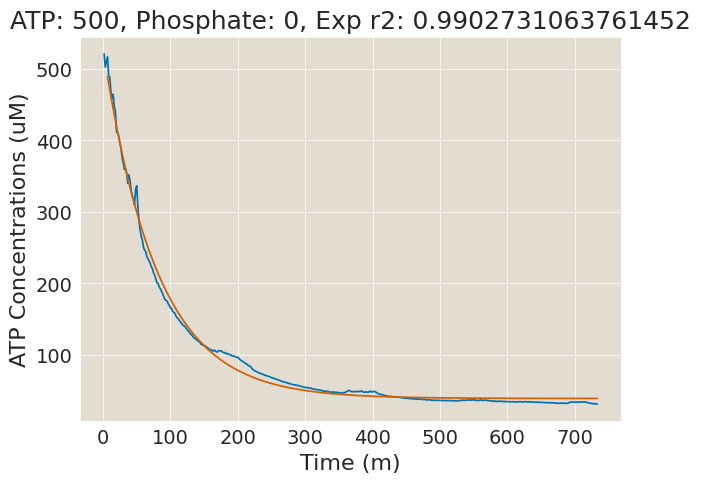

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

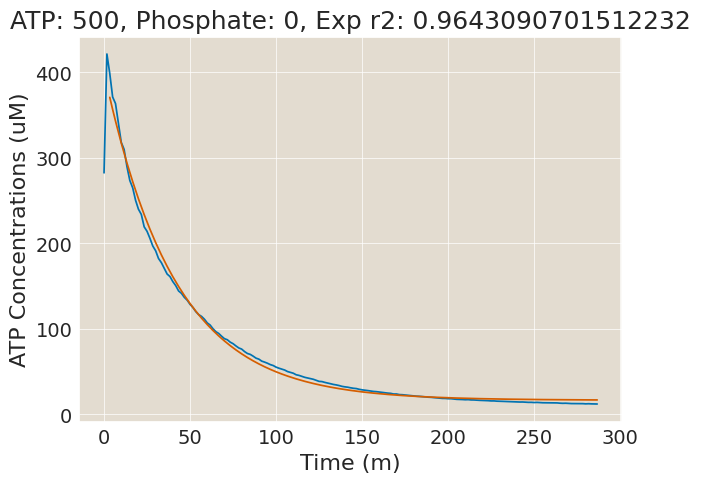

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

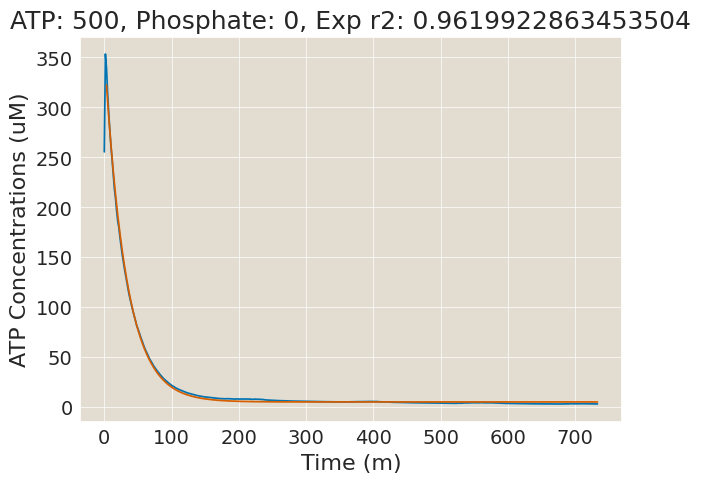

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

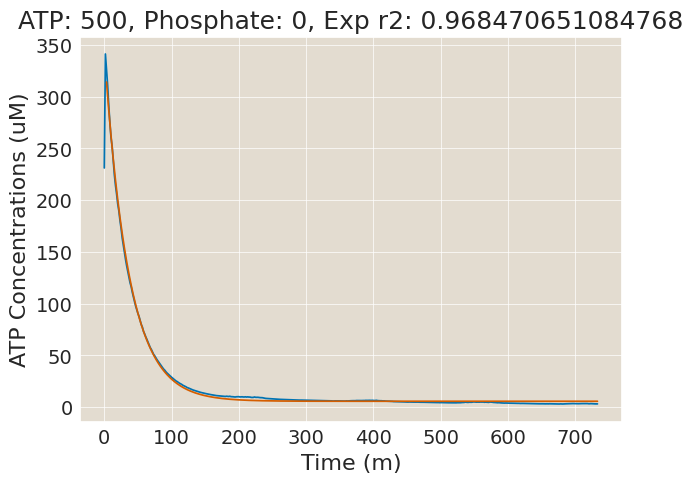

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

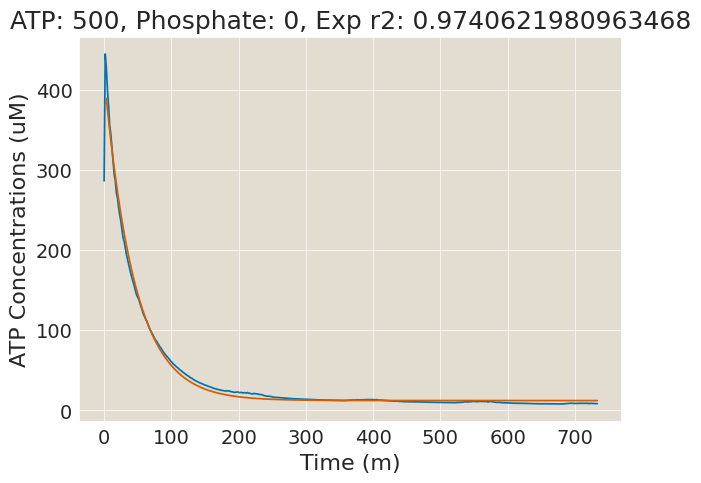

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

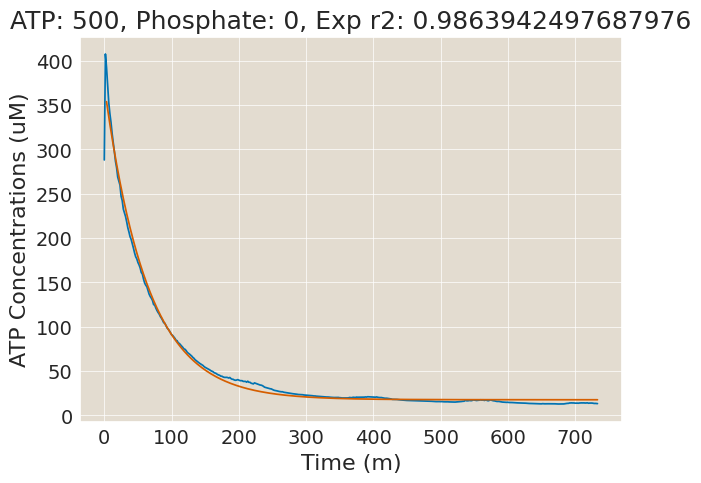

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

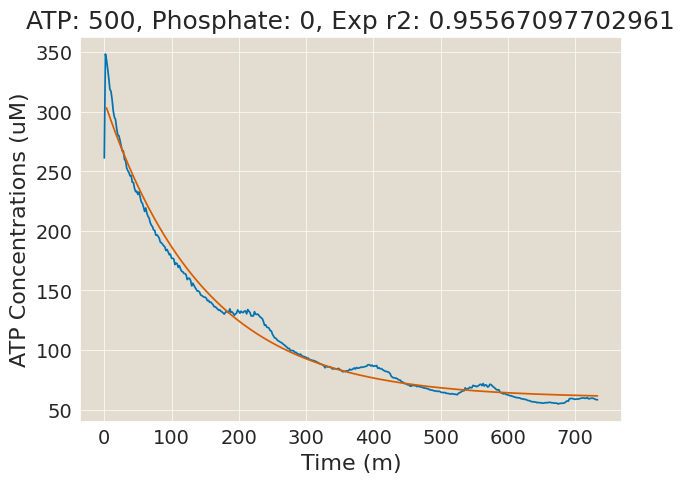

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

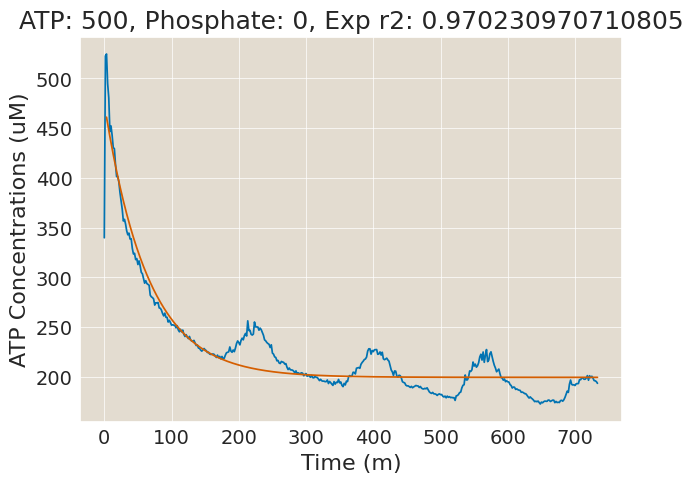

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

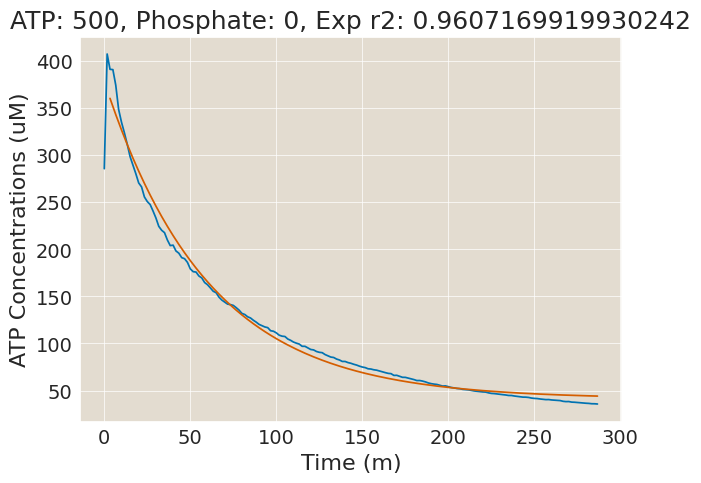

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

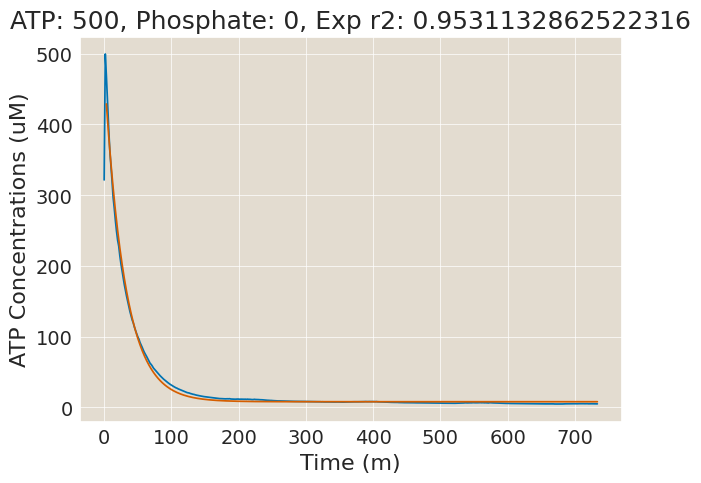

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

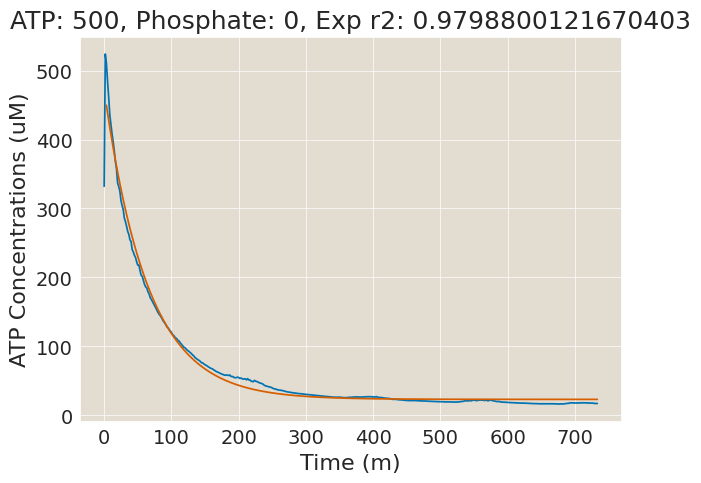

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

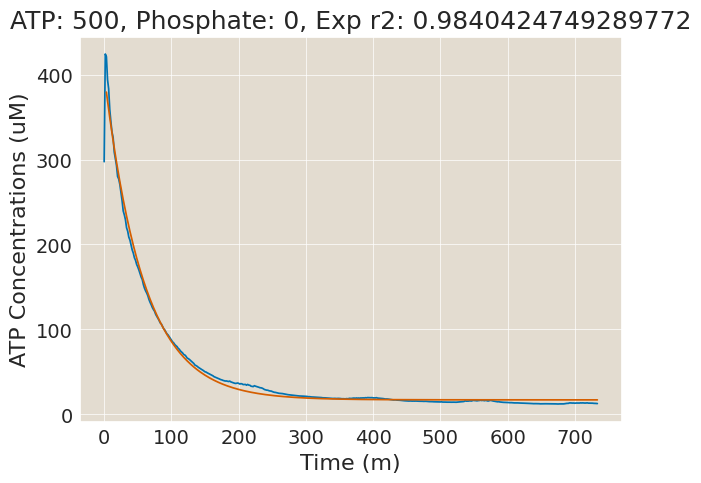

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

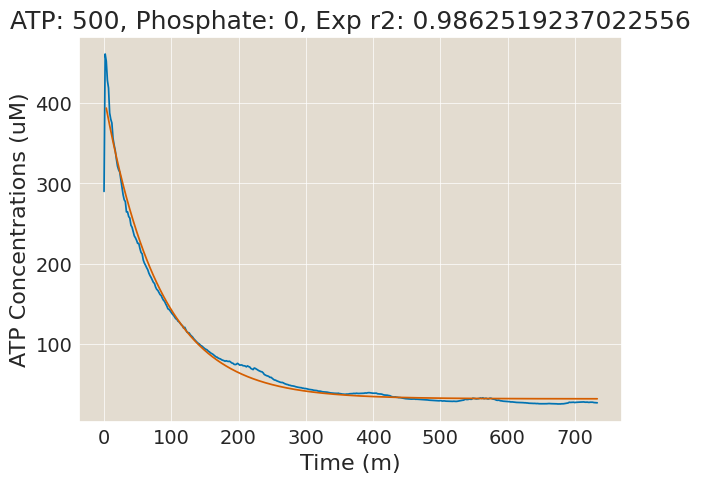

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

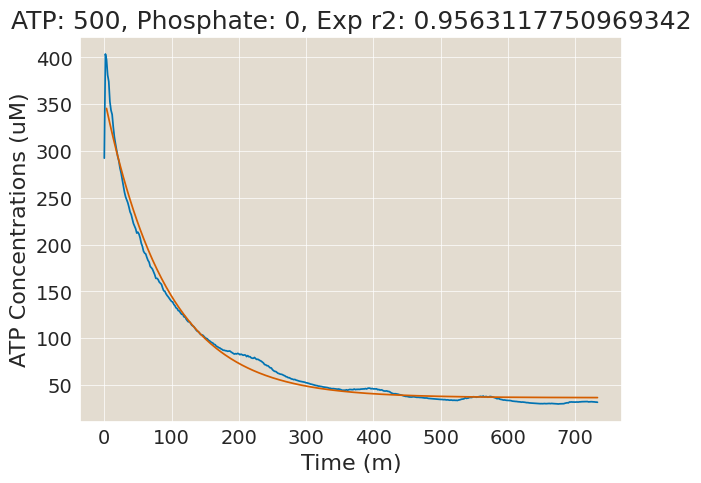

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

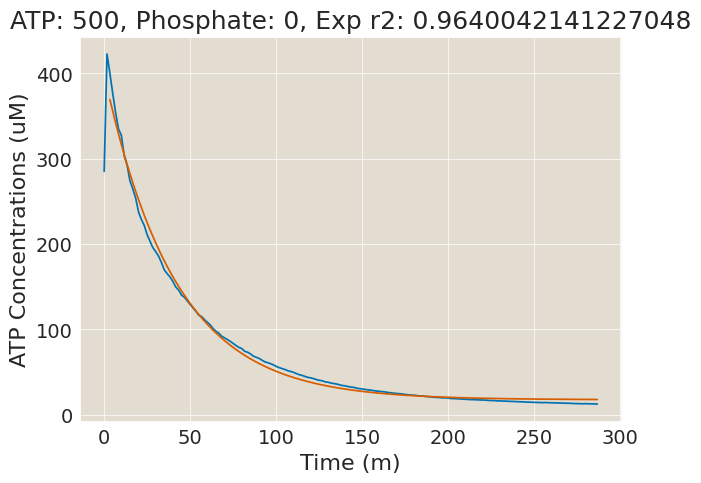

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

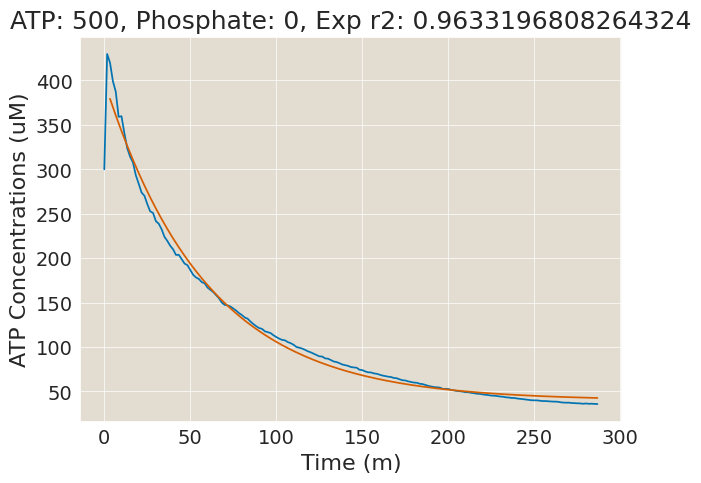

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

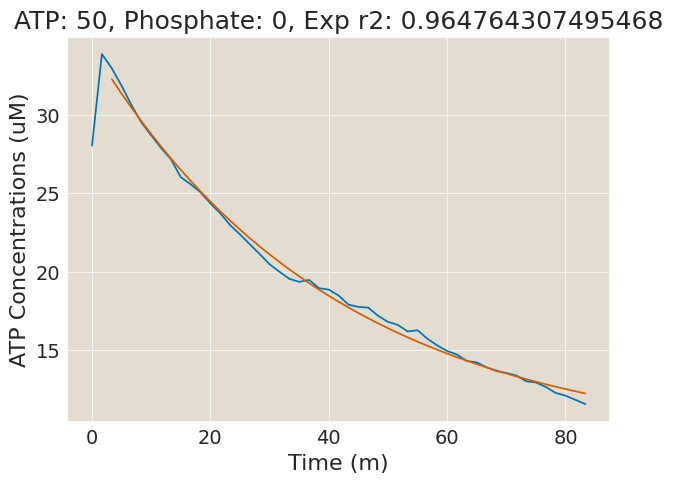

findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: Font family 'Lucida Sans Unicode' not found.
findfont: 

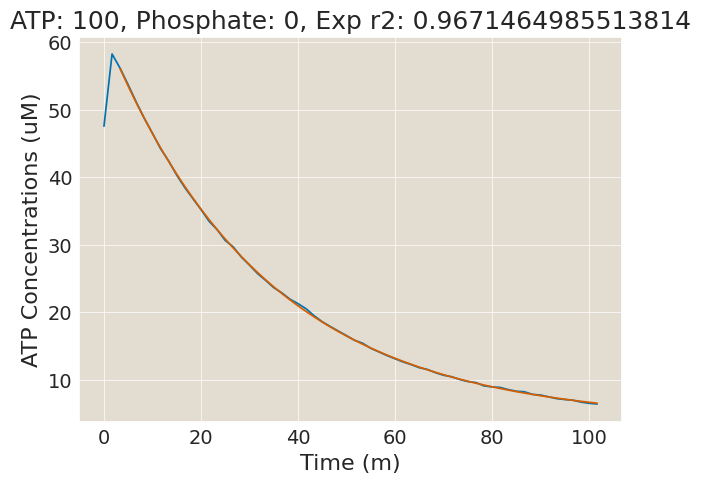

In [13]:
for i in low_exp_r2_list_index:
    exp_r2 = df["r-squared for exponential fit"][i]
    time = ast.literal_eval(df["Time Array (s)"][i])
    ATP_curve = ast.literal_eval(df["ATP Curve (uM)"][i])

    ATP_conc = df["ATP Concentration (uM)"][i]
    Phosphate_conc = df["P Concentration (uM)"][i]

    tau = df["Tau (s)"][i]
    A0 = df["A0 (uM)"][i]
    Ainf = df["Ainf (uM)"][i]
    start_time = df["Exponential Fitting Start Time (seconds)"][i]
    start_time_index = np.where(time == start_time)[0][0]
    exp_curve = atp_hydro.expfunc(np.array(time[start_time_index:]), tau, A0, Ainf) 

    # print(linear_params)
    plt.figure()
    plt.plot(np.array(time)/60, ATP_curve)
    plt.plot(np.array(time)[start_time_index:]/60, exp_curve, '-r')
    plt.xlabel('Time (m)')
    plt.ylabel('ATP Concentrations (uM)')
    # plt.vlines(start_time/60, 0, np.amax(ATP_curve), 'k')
    # plt.vlines(end_time/60, 0, np.amax(ATP_curve), 'k')
    plt.title(f'ATP: {ATP_conc}, Phosphate: {Phosphate_conc}, Exp r2: {exp_r2}')
    # plt.hlines(np.amax(ATP_curve)*0.75, 0, np.amax(time)/60, 'k')